## Introduction

In this Dengue Predicting Disease Spread challenge, we need to predict the total dengue cases reported for each city in each year and weekofyear. Based on the predicted data,the responsible agencies can take action to prevent it.

#### Some known facts about Dengue :
Dengue is a viral disease transmitted by some types of mosquitoes. Dengue outbreaks occur in each year. And dengue does not spread from person to person and is transmitted through the bite of an infected mosquito( Aedes aegypti and Aedes albopictus species of mosquito ). Mosquitoes become infected with dengue after biting sick humans who have dengue virus in their blood. Between 8 and 12 days later if an infected mosquito bites someone else it can pass on the dengue virus. this disease causes illness that can range from a mild fever to a severe, even fatal condition.

How to Prevent : Avoiding mosquito bites is the best prevention

#### Effects of weather factors on dengue fever:
Temperature, rainfall and humidity have well-defined roles in the Dengue transmission cycle. Prolonged periods of heavy rain increase the opportunities for the diseases to spread. Longer seasons of mild temperatures may increase the transmission likelihood of dengue diseases. In warmer temperatures, dengue become infectious more quickly and can transmit virus earlier in their lives. In addition, the temperature must be “just right”; if too cold, the virus takes too long to replicate, and if too hot, the dengue virus lifespans are decreased. Humidity has been identified as a consistent, substantial weather factor to provide favorable conditions for dengue. But the dengue incidence and weather factors also apparently varies by locality.

### Mosquito life cycle
The life cycle of Aedes aegypti can be completed within one-and-a-half to three weeks. Male mosquitoes live three to five days. The females live considerably longer, depending on how much warmth and moisture is in their environment. Under ideal conditions, they may last as long as a month or two.
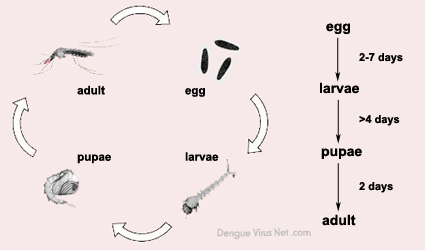


The data contains weather variables( temperature, precipitation , humidity ) and satellite imagery measurements of vegetation are available. 

In the following we will explore the data, prepare it for a model, train a model and predict the target value for the test set, then prepare a submission.

#### Data Source
Using environmental data collected by various U.S. Federal Government agencies—from the Centers for Disease Control and Prevention to the National Oceanic and Atmospheric Administration in the U.S. Department of Commerce

This interagency project will assess forecasts using historical data from Iquitos, Peru and San Juan, Puerto Rico. https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/

###### Quick Facts About Iquitos and San Juan
###### San Juan
San Juan, Puerto Rico's capital and largest city, sits on the island's Atlantic coast.

 • Land	47.9 sq mi (124 km2).
 • Water	29.1 sq mi (75 km2)  37.8%.
 • Population : 395,326 ( as per 2010 census ).
 
In San Juan, the summers are long, hot, wet, and mostly cloudy; the winters are warm, windy, and mostly clear; and it is oppressive year round. 
Over the course of the year, the temperature typically varies from 22°C to 31°C and is rarely below 20°C or above 33°C.
The hot season lasts for 4.9 months, from May 26 to October 23, with an average daily high temperature above 31°C. The hottest day of the year is August 21, with an average high of 31°C and low of 25°C. The cool season lasts for 3.1 months, from December 6 to March 9, with an average daily high temperature below 29°C. The coldest day of the year is January 25, with an average low of 22°C and high of 28°C.
The wetter season lasts 7.3 months, from April 24 to December 2, with a greater than 35% chance of a given day being a wet day. The chance of a wet day peaks at 50% on September 26.
The drier season lasts 4.7 months, from December 2 to April 24. The smallest chance of a wet day is 20% on January 9. 
Rain falls throughout the year in San Juan. The most rain falls during the 31 days centered around September 18, with an average total accumulation of 121 millimeters. The least rain falls around January 11, with an average total accumulation of 32 millimeters.


###### Iquitos
Iquitos is a Peruvian port city and gateway to the jungle lodges and tribal villages of the northern Amazon. Its district of Belén is known for its massive open-air street market and rustic stilt houses lining the Itaya River.

 • Land	784 km2 (302.6 sq mi)
 • Water	340 km2 (132 sq mi)
 • Population 377,609(2017)
 
In Iquitos, the summers are hot and overcast; the winters are short, warm, and partly cloudy; and it is oppressive and wet year round. Over the course of the year, the temperature typically varies from 22°C to 32°C and is rarely below 20°C or above 34°C.
The hot season lasts for 3.1 months, from August 30 to December 1, with an average daily high temperature above 31°C. The hottest day of the year is October 4, with an average high of 32°C and low of 23°C.

The cool season lasts for 1.8 months, from May 29 to July 24, with an average daily high temperature below 30°C. The coldest day of the year is July 19, with an average low of 22°C and high of 30°C.
The wetter season lasts 7.9 months, from October 11 to June 8, with a greater than 47% chance of a given day being a wet day. The chance of a wet day peaks at 60% on March 23.

The drier season lasts 4.1 months, from June 8 to October 11. The smallest chance of a wet day is 34% on July 30.
Rain falls throughout the year in Iquitos. The most rain falls during the 31 days centered around April 3, with an average total accumulation of 264 millimeters.

![alt text](Loc_map.JPG "Title")

## Prepare for data analysis

## Load packages

In [506]:
%matplotlib inline    
# Line magic command will make plot outputs appear and be stored within the notebook.
import matplotlib.pyplot as plt   # matplotlib's plotting framework

import numpy as np    # fundamental package for scientific computing
import pandas as pd   # Python Data Analysis Library
import seaborn as sns # library for making statistical graphics in Python
import os             # operating system dependent functionality, file descriptor..

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
# Let's check what data files are available.
IS_LOCAL = False
if(IS_LOCAL):
    PATH="../input/Dengue/"
else:
    PATH="./Data/"
os.listdir(PATH)

['dengue_features_test.csv',
 'dengue_features_train - Copy.csv',
 'dengue_features_train.csv',
 'dengue_labels_train.csv',
 'submission_format.csv',
 'X_iq_data.xlsx',
 'X_iq_test.xlsx',
 'X_sj_data.xlsx',
 'X_sj_test.xlsx',
 '~$X_sj_data.xlsx',
 '~$X_sj_test.xlsx']

In [3]:
# let's load the train and test data# let's load the train and test data

dengue_train_target    = pd.read_csv( PATH + 'dengue_labels_train.csv' )
dengue_test_features   = pd.read_csv( PATH + 'dengue_features_test.csv', parse_dates=[3] )
dengue_train_features  = pd.read_csv( PATH + 'dengue_features_train.csv', parse_dates=[3] )

## Data exploration

### Check the data dimension

In [4]:
dengue_train_features.shape

(1456, 24)

In [5]:
dengue_train_target.shape

(1456, 4)

In [6]:
dengue_test_features.shape

(416, 24)

##### Train data has 1456 entries and 24 columns. and test  data also have 24 columns of features.

## Data Preview

In [7]:
dengue_train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [8]:
dengue_train_target.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [9]:
dengue_test_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [10]:
dengue_train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysi

In [11]:
dengue_train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
city           1456 non-null object
year           1456 non-null int64
weekofyear     1456 non-null int64
total_cases    1456 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [12]:
dengue_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null datetime64[ns]
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_

In [13]:
# Checking columns having null values
dengue_train_features.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

The larget missing count is in ndvi_ne( 194 / 1456 ). it is less than 15% of train data.

In [14]:
dengue_test_features.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

##### Exploring the distribution of Target Feature


0      100
6       71
3       70
5       70
2       69
1       59
7       58
4       56
8       44
9       43
11      40
10      39
17      36
13      34
14      31
16      31
12      29
18      28
21      24
20      21
23      20
15      20
26      20
25      19
30      18
19      17
28      16
29      16
22      16
31      15
      ... 
359      1
364      1
381      1
395      1
410      1
169      1
126      1
150      1
104      1
77       1
426      1
78       1
81       1
58       1
90       1
91       1
99       1
101      1
108      1
149      1
115      1
119      1
74       1
128      1
131      1
135      1
137      1
141      1
142      1
461      1
Name: total_cases, Length: 135, dtype: int64

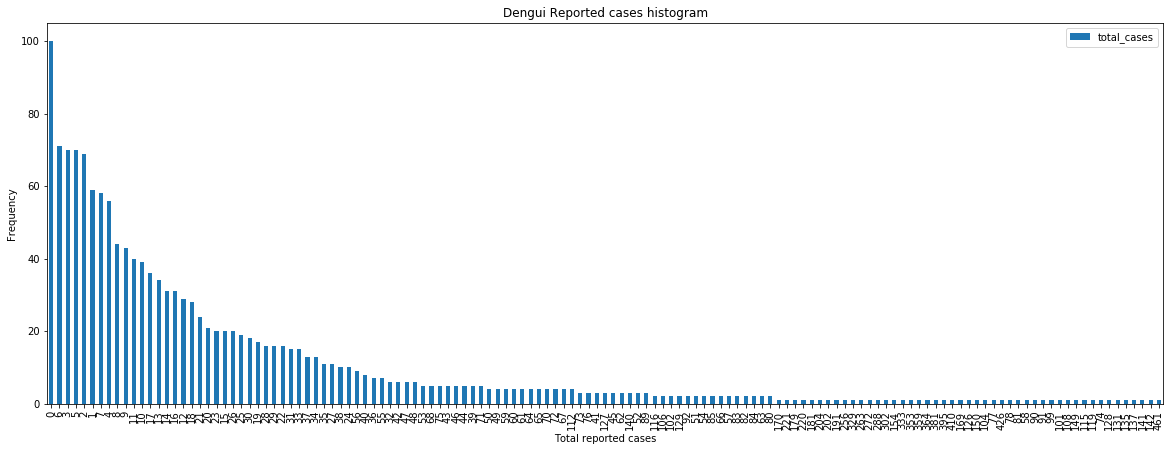

In [16]:
plt.figure( figsize=( 20, 7 ))
pd.value_counts(dengue_train_target.total_cases).plot.bar()
plt.title('Dengui Reported cases histogram')
plt.xlabel('Total reported cases')
plt.ylabel('Frequency')
plt.legend()
dengue_train_target.total_cases.value_counts()

###### The Data is not a imbalance data.

In [17]:
# Now we are creating the new features from week_start_date column
dengue_train_features['month']   =  dengue_train_features['week_start_date'].dt.month
dengue_train_features['quarter'] =  dengue_train_features['week_start_date'].dt.quarter

In [18]:
# As per the file comparison of columns(city	year	weekofyear) in 
# dengue_features_train.csv and dengue_labels_train.csv. Its matching. adding total_cases column to main dataframe
dengue_train_features['total_cases'] = dengue_train_target['total_cases'].copy()
dengue_train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month,quarter,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,2,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,2,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,5,2,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,5,2,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,5,2,6


In [19]:
# Checking duplicate rows
np.sum(dengue_train_features.duplicated())

0

In [20]:
dengue_train_features.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000


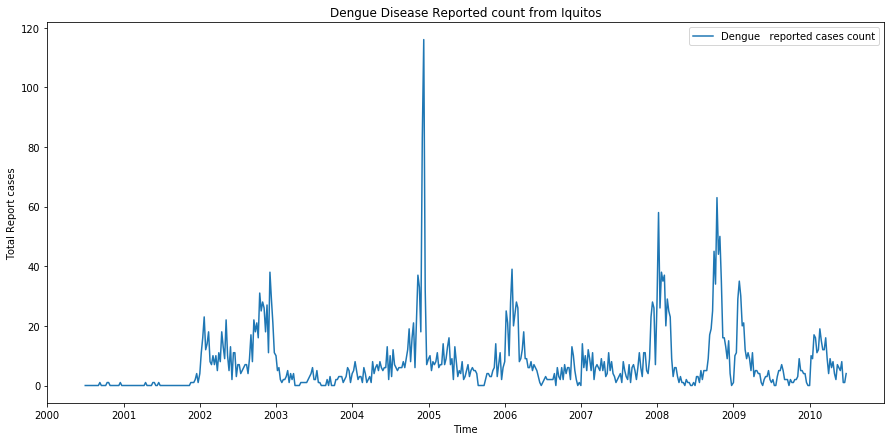

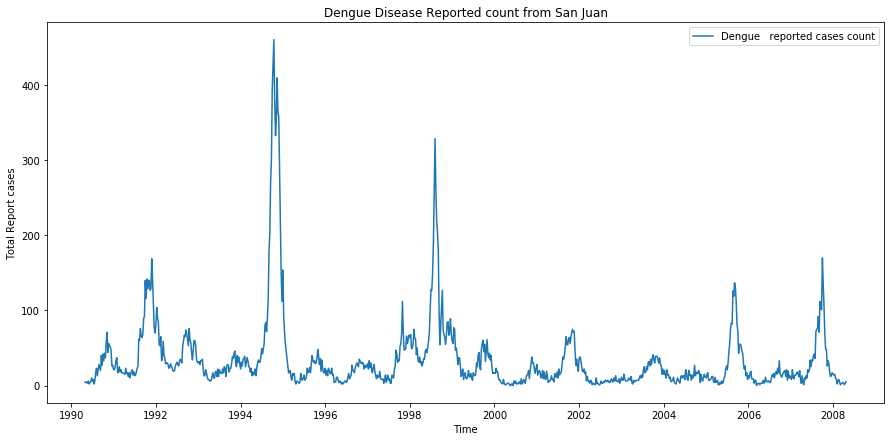

In [21]:
#Plot total dengue reported cases over time
for city_name in ['iq', 'sj']:
    data = dengue_train_features[dengue_train_features['city'] == city_name ]
    plt.figure( figsize=( 15, 7 ))
    plt.xlabel('Time')
    plt.ylabel('Total Report cases')
    plt.plot(data.week_start_date,data['total_cases'], label='Dengue   reported cases count' )
    city_name = "Iquitos" if city_name == 'iq' else "San Juan"        # sj for San Juan and iq for Iquitos
    plt.title( 'Dengue Disease Reported count from ' +  city_name ) 
    plt.legend()
    plt.show()

In [22]:
# setting the week_start_date as index
dengue_train_features.set_index('week_start_date',inplace=True)

##### Yearwise pattern of each city

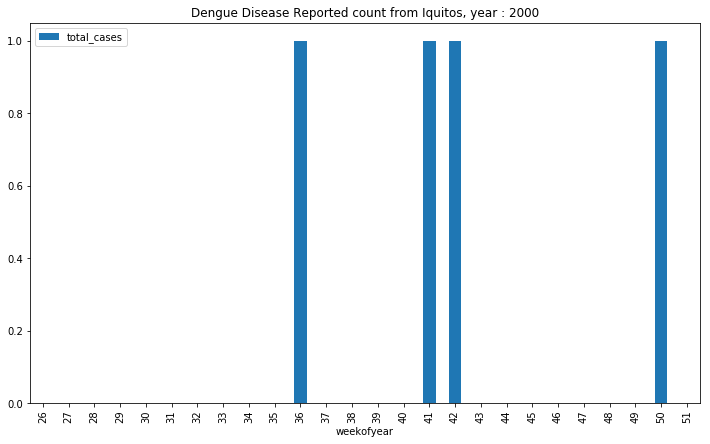

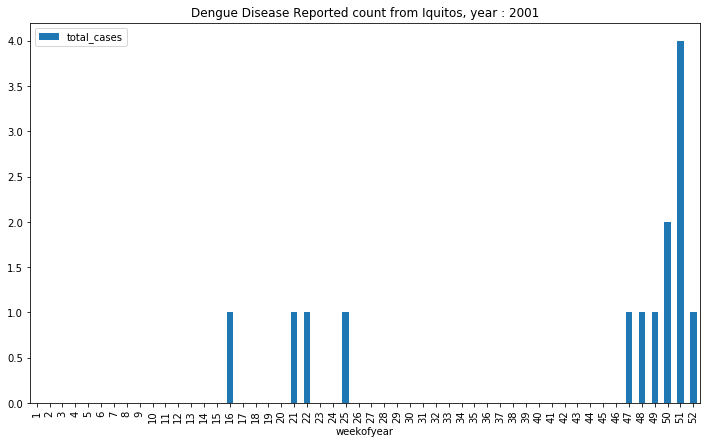

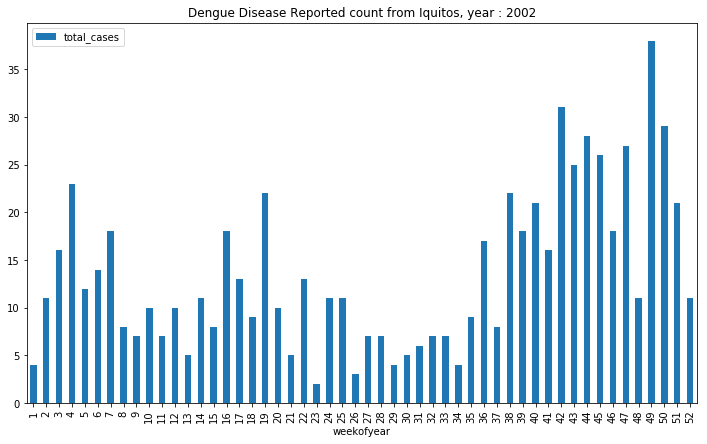

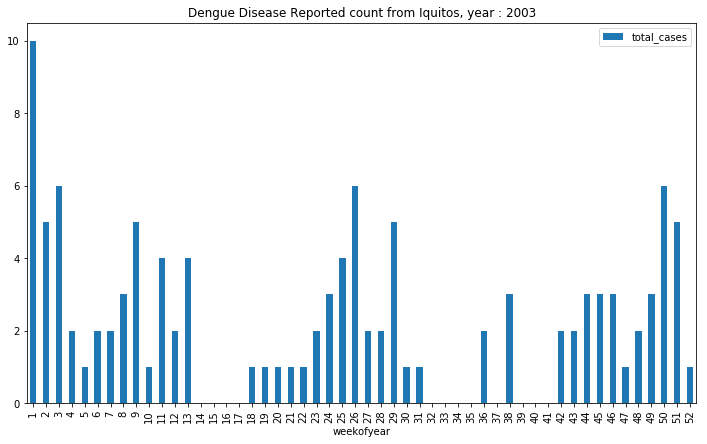

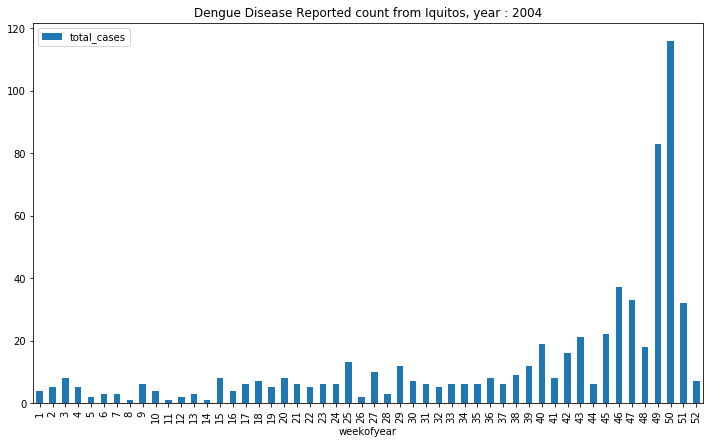

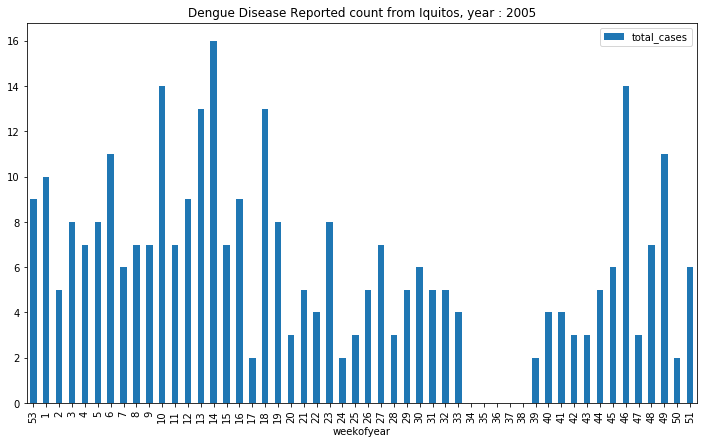

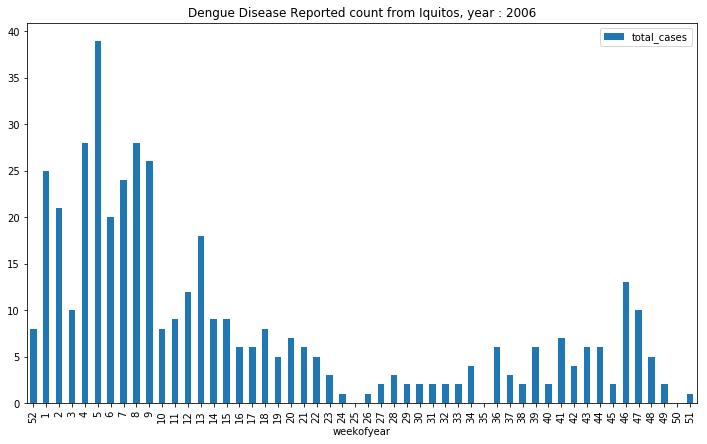

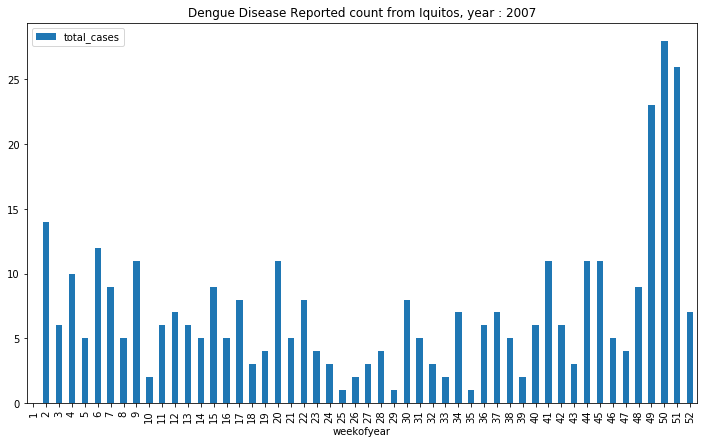

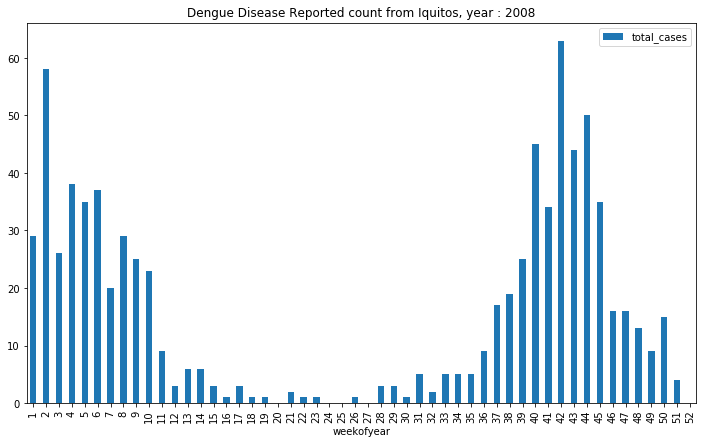

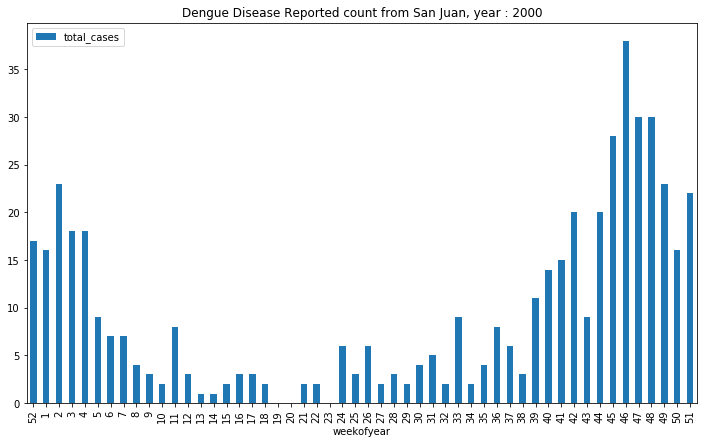

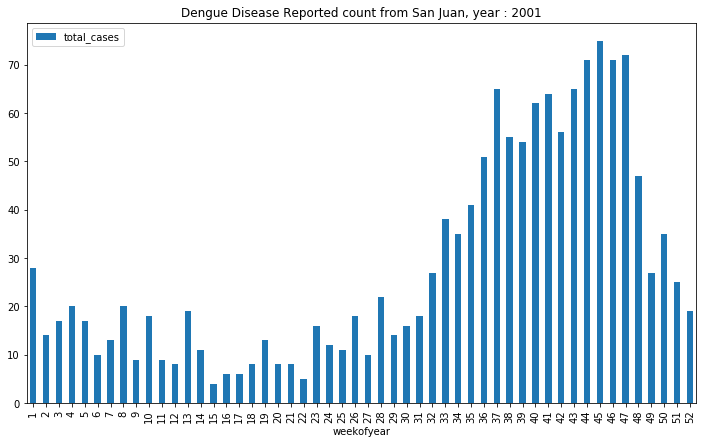

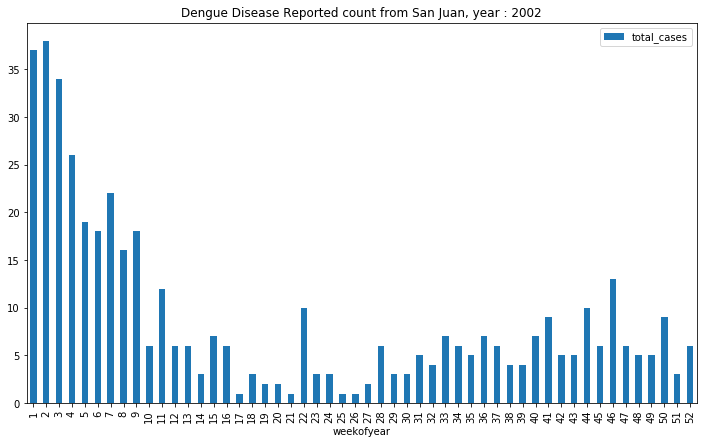

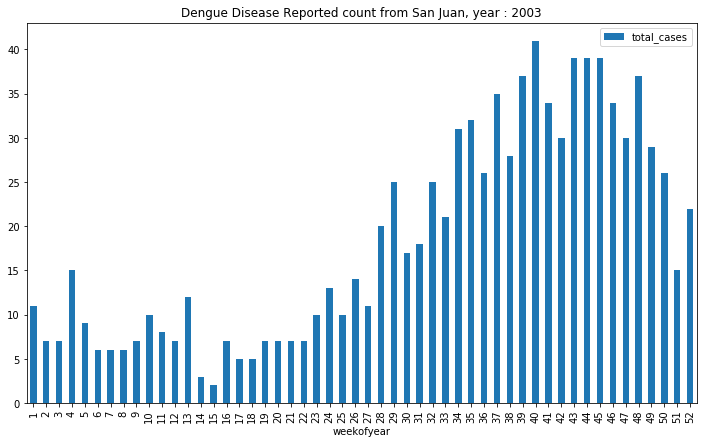

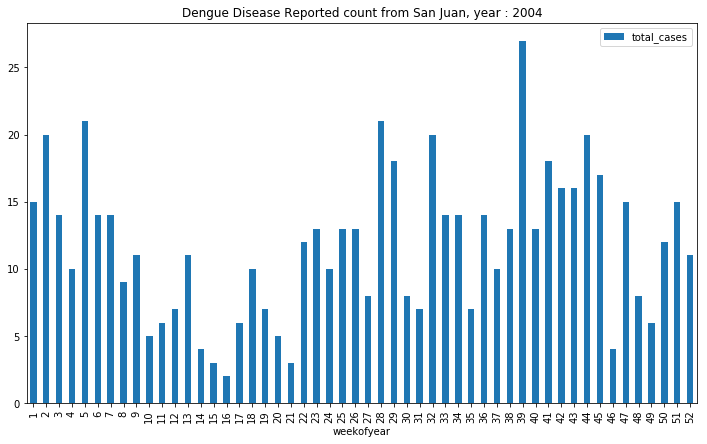

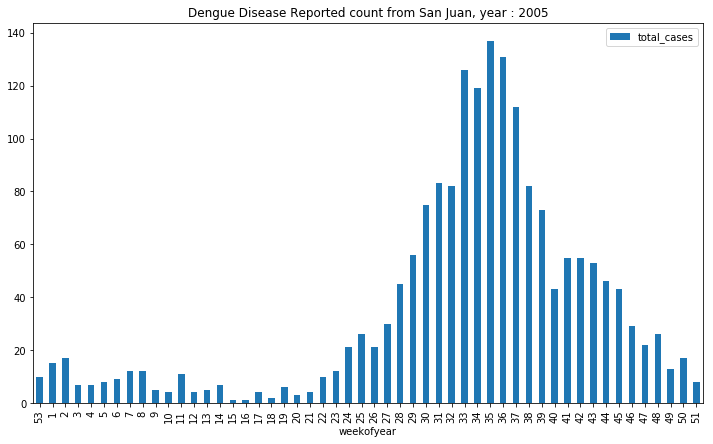

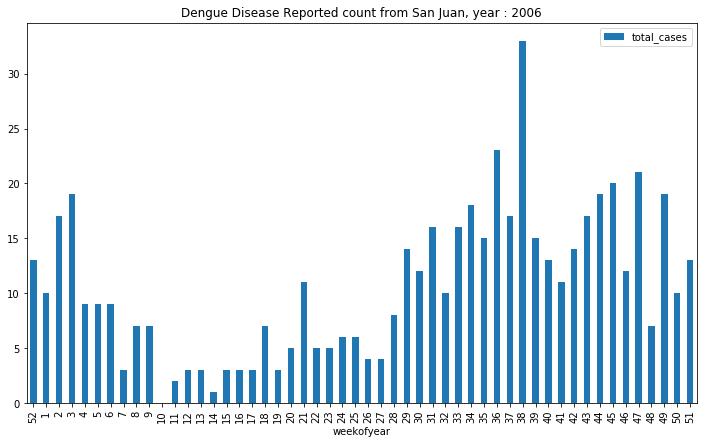

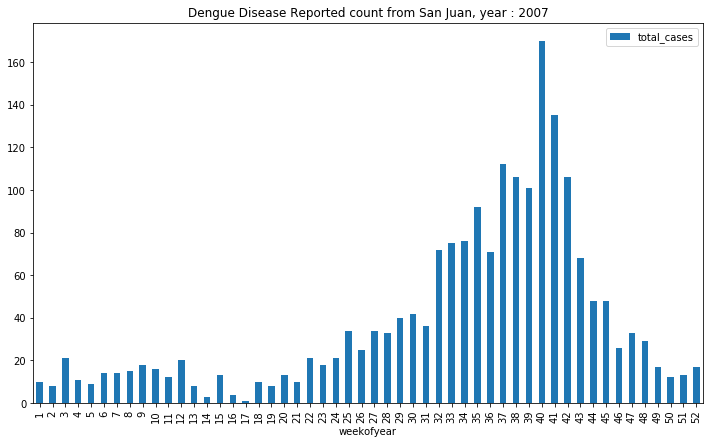

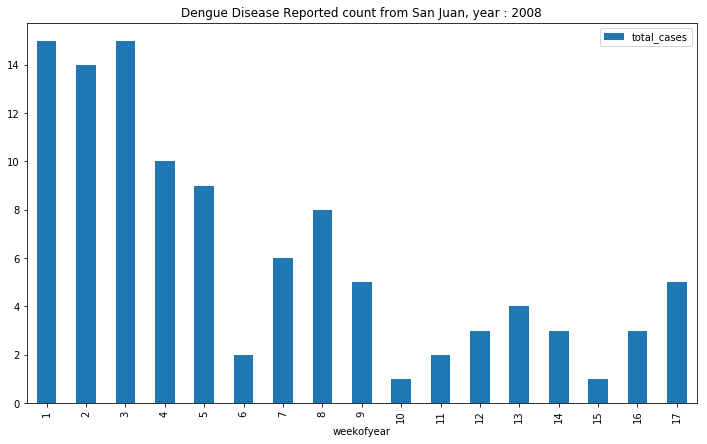

In [23]:
for city in ['iq', 'sj']:
    for year in range( 2000,2009):
        yearwiseData = dengue_train_target[dengue_train_target['city'] == city][dengue_train_target['year'] == year]
        yearwiseData.plot.bar( 'weekofyear', 'total_cases', figsize=(12,7)) # , legend=False, ylim = ylim
        city_name = "Iquitos" if city == 'iq' else "San Juan"        # sj for San Juan and iq for Iquitos
        plt.title( 'Dengue Disease Reported count from ' +  city_name + ", year : " + str(year))
        plt.legend()

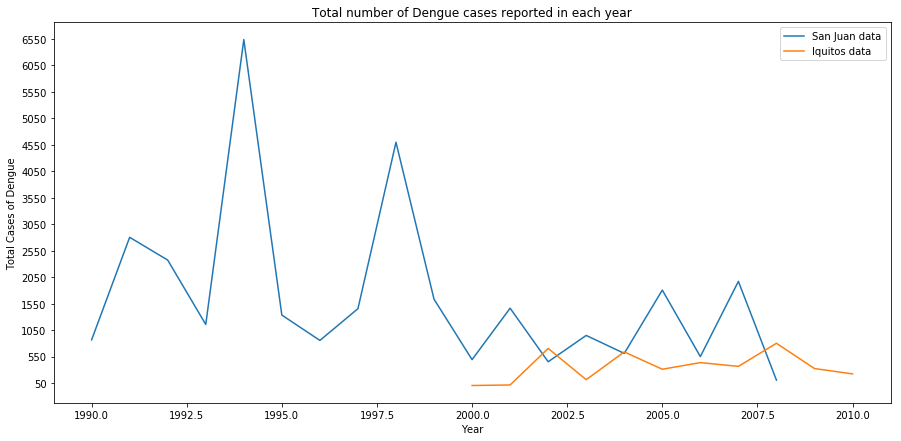

In [24]:
year_sj_max_cases = dengue_train_target[dengue_train_target['city'] == 'sj'].groupby(['year'])['total_cases'].agg('sum')
year_iq_max_cases = dengue_train_target[dengue_train_target['city'] == 'iq'].groupby(['year'])['total_cases'].agg('sum')
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot(year_sj_max_cases, label='San Juan data' )
plt.plot(year_iq_max_cases, label='Iquitos data')
plt.yticks(np.arange(50,7000, step=500))
plt.legend()
plt.title( 'Total number of Dengue cases reported in each year')
plt.show()

Looks like, the required precautions are not handled before 2000.

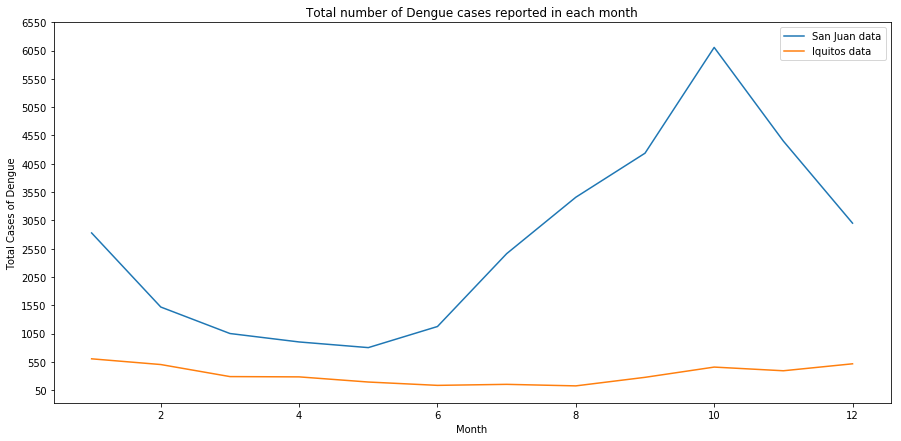

In [25]:
year_sj_max_cases = dengue_train_features[dengue_train_features['city'] == 'sj'].groupby(['month'])['total_cases'].agg('sum')
year_iq_max_cases = dengue_train_features[dengue_train_features['city'] == 'iq'].groupby(['month'])['total_cases'].agg('sum')
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Month')
plt.ylabel('Total Cases of Dengue')
plt.plot(year_sj_max_cases, label='San Juan data' )
plt.plot(year_iq_max_cases, label='Iquitos data')
plt.yticks(np.arange(50,7000, step=500))
plt.legend()
plt.title( 'Total number of Dengue cases reported in each month')
plt.show()

The 1990 to 1999 data is affecting this monthly chart. lets split the data and consider the data from from 1999 for our analysis.

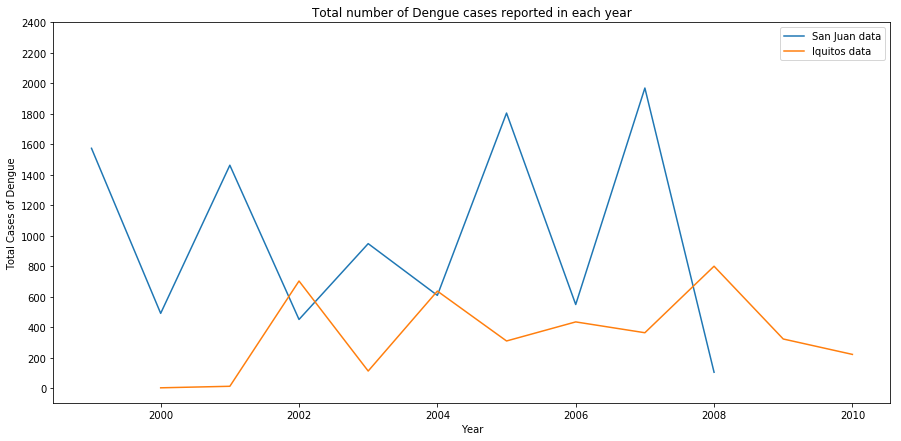

In [26]:
dengue_train_features_from1999 = dengue_train_features[dengue_train_features.index >  '01-Jan-1999'].copy()
year_sj_max_cases = dengue_train_features_from1999[dengue_train_features_from1999['city'] == 'sj'].groupby(['year'])['total_cases'].agg('sum')
year_iq_max_cases = dengue_train_features_from1999[dengue_train_features_from1999['city'] == 'iq'].groupby(['year'])['total_cases'].agg('sum')
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot(year_sj_max_cases, label='San Juan data' )
plt.plot(year_iq_max_cases, label='Iquitos data')
plt.yticks(np.arange(0,2500, step=200))
plt.legend()
plt.title( 'Total number of Dengue cases reported in each year')
plt.show()

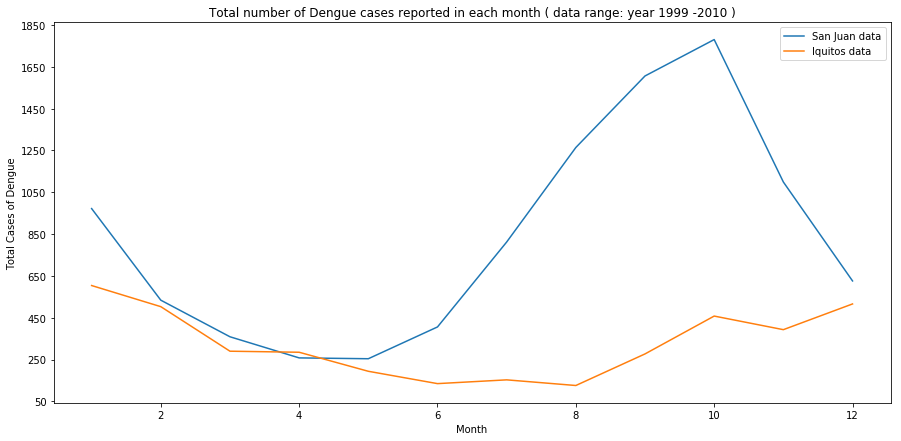

In [27]:
year_sj_max_cases = dengue_train_features_from1999[dengue_train_features_from1999['city'] == 'sj'].groupby(['month'])['total_cases'].agg('sum')
year_iq_max_cases = dengue_train_features_from1999[dengue_train_features_from1999['city'] == 'iq'].groupby(['month'])['total_cases'].agg('sum')
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Month')
plt.ylabel('Total Cases of Dengue')
plt.plot(year_sj_max_cases, label='San Juan data' )
plt.plot(year_iq_max_cases, label='Iquitos data')
plt.yticks(np.arange(50,2000, step=200))
plt.legend()
plt.title( 'Total number of Dengue cases reported in each month ( data range: year 1999 -2010 )')
plt.show()

- Most of the reported  cases is in the end of the year ( months 8,9,10,11 )
- Less number of cases are reported in May month
- As pr the data, from 2000, the reported cases are reduced compared to earlier years

##### Let's check the missing data and its datatype

###### month and quarter column

In [28]:
dengue_train_features['month']   =  dengue_train_features['month'].astype('category')
dengue_train_features['quarter']   =  dengue_train_features['quarter'].astype('category')

###### city column

In [29]:
# start with the city column in train data
# In city column, 1456 entries are available
dengue_train_features['city'].unique()

array(['sj', 'iq'], dtype=object)

In [30]:
# All the values in the city column are expected values
# we can consider the city feature as category, because only two city names are there. sj for San Juan and iq for Iquitos
# dengue_train_features['city'] = dengue_train_features['city'].astype('category')
# later we are going to split the data based on city column and after that this column is not required.

###### Year column

In [31]:
# year column contains 1456 entries
dengue_train_features['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

In [32]:
# All the values in the year column are expected values
# but the data type int64 is not required to store year value
dengue_train_features['year'] = dengue_train_features['year'].astype('int16')
# we can consider this feature as categorical too. In model creation time, we will recheck that.

###### weekofyear column

In [33]:
# weekofyear column contains 1456 entries

In [34]:
dengue_train_features['weekofyear'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 53], dtype=int64)

In [35]:
# All the values in the year column are expected values
# but the data type int64 is not required to store weekofyear value
dengue_train_features['weekofyear'] = dengue_train_features['weekofyear'].astype('int8')
# we can consider this feature as categorical too. In model creation time, we will recheck that.

In [36]:
dengue_train_features['weekofyear'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 53], dtype=int64)

###### week_start_date column


In [37]:
# week_start_date column contains 1456 entries
# And we set week_start_date column as index. No further changes are required.

In [38]:
dengue_train_features = pd.get_dummies( dengue_train_features, columns=[ 'month','quarter'] )

In [39]:
dengue_train_features.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000


#### Data Splitting based on city column

Before analyzing the next set feautures, we need to split the data.
This dataset has two cities in it: San Juan, Puerto Rico (sj) and Iquitos, Peru (iq). 
The spread of dengue may follow different patterns between the two cities. So the dataset should be partitioned in to two sets.
And in the balance features, lot of data is missing.  We need to impute the features with the splited data set.

In [40]:
dengue_train_sj = dengue_train_features[dengue_train_features['city'] == 'sj'].copy()
dengue_train_iq = dengue_train_features[dengue_train_features['city'] == 'iq'].copy()

In [41]:
dengue_train_sj.describe().T

,count,mean,std,min,25%,50%,75%,max
year,936.0,1998.826923,5.212076,1990.000000,1994.000000,1999.000000,2003.000000,2008.000000
weekofyear,936.0,26.503205,15.021909,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,745.0,0.057925,0.107153,-0.406250,0.004500,0.057700,0.111100,0.493400
ndvi_nw,887.0,0.067469,0.092479,-0.456100,0.016425,0.068075,0.115200,0.437100
ndvi_se,917.0,0.177655,0.057166,-0.015533,0.139283,0.177186,0.212557,0.393129
ndvi_sw,917.0,0.165956,0.056073,-0.063457,0.129157,0.165971,0.202771,0.381420
precipitation_amt_mm,927.0,35.470809,44.606137,0.000000,0.000000,20.800000,52.180000,390.600000
reanalysis_air_temp_k,930.0,299.163653,1.236429,295.938571,298.195000,299.254286,300.132857,302.200000
reanalysis_avg_temp_k,930.0,299.276920,1.218637,296.114286,298.300000,299.378571,300.228571,302.164286
reanalysis_dew_point_temp_k,930.0,295.109519,1.569943,289.642857,293.847857,295.464286,296.418929,297.795714


In [42]:
dengue_train_iq.describe().T

,count,mean,std,min,25%,50%,75%,max
year,520.0,2005.000000,2.918283,2000.000000,2002.750000,2005.000000,2007.250000,2010.000000
weekofyear,520.0,26.503846,15.029450,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,517.0,0.263869,0.081370,0.061729,0.200000,0.263643,0.319971,0.508357
ndvi_nw,517.0,0.238783,0.076751,0.035860,0.179540,0.232971,0.293929,0.454429
ndvi_se,517.0,0.250126,0.077354,0.029880,0.194743,0.249800,0.302300,0.538314
ndvi_sw,517.0,0.266779,0.086345,0.064183,0.204129,0.262143,0.325150,0.546017
precipitation_amt_mm,516.0,64.245736,35.218995,0.000000,39.105000,60.470000,85.757500,210.830000
reanalysis_air_temp_k,516.0,297.869538,1.170997,294.635714,297.092500,297.822857,298.649286,301.637143
reanalysis_avg_temp_k,516.0,299.133043,1.332073,294.892857,298.221429,299.121429,300.123214,302.928571
reanalysis_dew_point_temp_k,516.0,295.492982,1.417229,290.088571,294.593929,295.852143,296.548571,298.450000


##### Feature Correlation Analysis

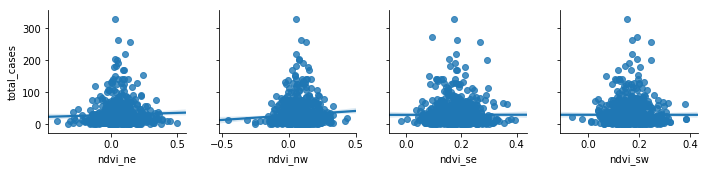

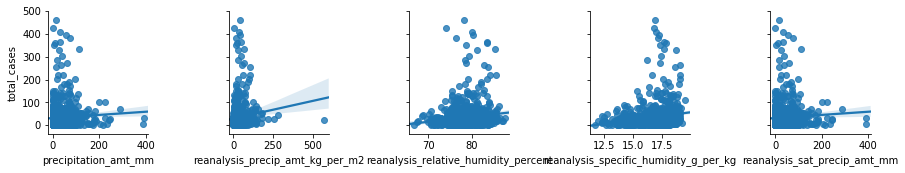

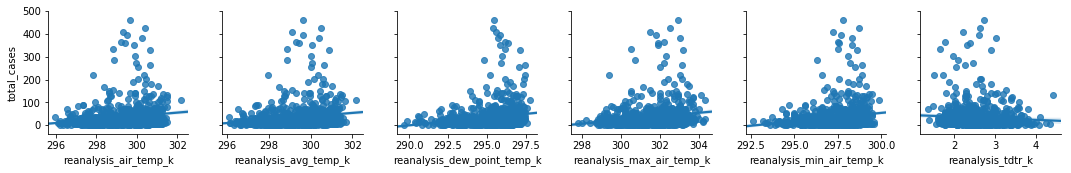

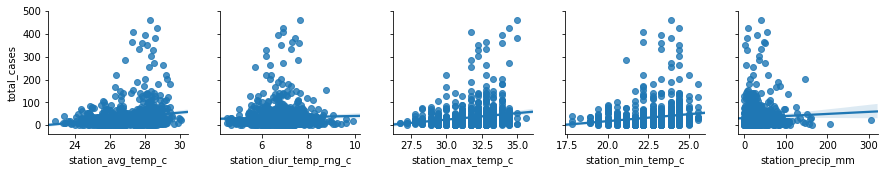

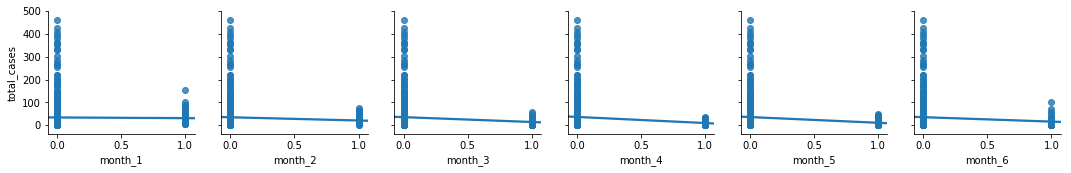

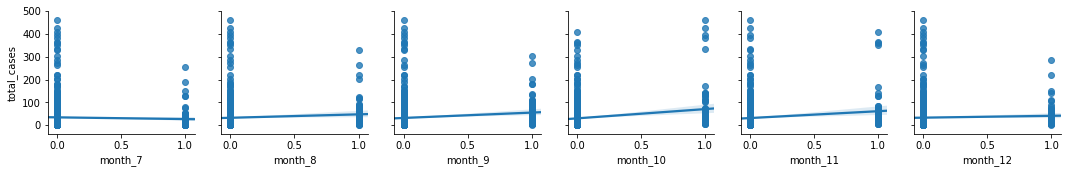

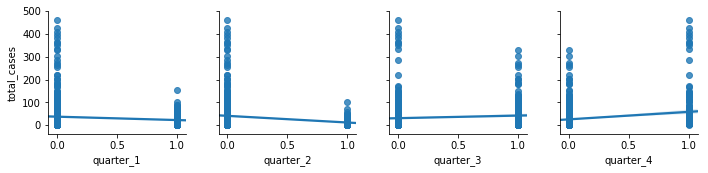

In [43]:
# plotting of pairwise relationships
sns.pairplot( dengue_train_sj, x_vars=['ndvi_ne', 'ndvi_nw', 'ndvi_se','ndvi_sw'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 
                                       'reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg',
                                       'reanalysis_sat_precip_amt_mm'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=[ 'reanalysis_air_temp_k',
                                        'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                        'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                                       'reanalysis_tdtr_k'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
                                       'station_min_temp_c', 'station_precip_mm'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['month_7','month_8', 'month_9', 'month_10', 'month_11', 'month_12'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['quarter_1','quarter_2', 'quarter_3', 'quarter_4'], y_vars=['total_cases'], kind="reg")

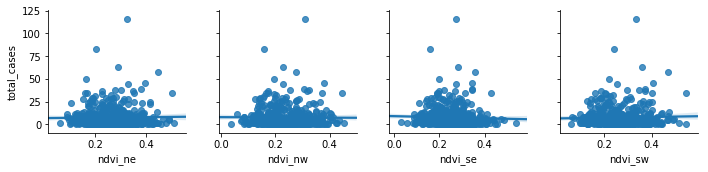

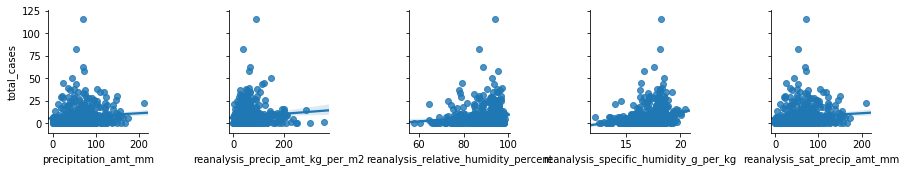

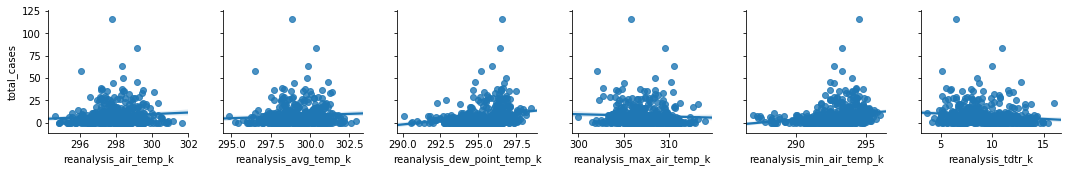

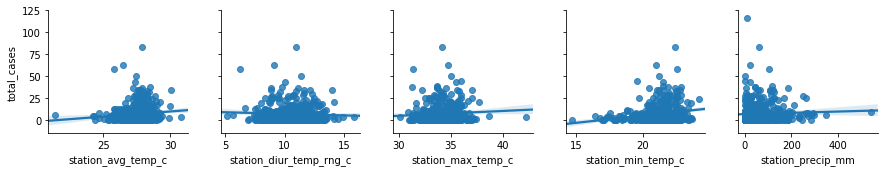

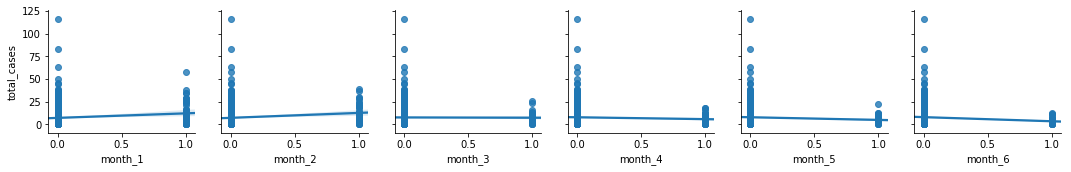

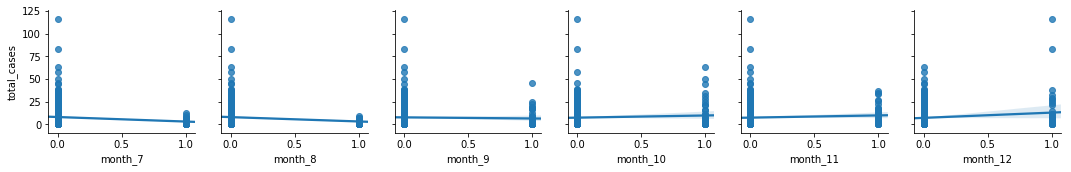

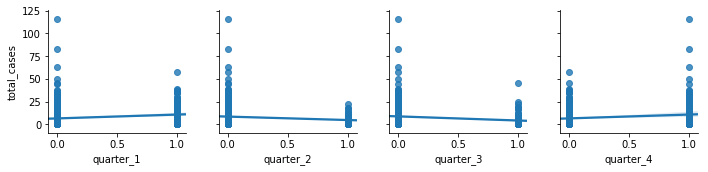

In [44]:
# plotting of pairwise relationships
sns.pairplot( dengue_train_iq, x_vars=['ndvi_ne', 'ndvi_nw', 'ndvi_se','ndvi_sw'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 
                                       'reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg',
                                       'reanalysis_sat_precip_amt_mm'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=[ 'reanalysis_air_temp_k',
                                        'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                        'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                                       'reanalysis_tdtr_k'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
                                       'station_min_temp_c', 'station_precip_mm'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['month_7','month_8', 'month_9', 'month_10', 'month_11', 'month_12'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['quarter_1','quarter_2', 'quarter_3', 'quarter_4'], y_vars=['total_cases'], kind="reg")

In [45]:
def plotVarCorr( data, title ):
    corr = data.corr()
    fig = plt.figure(  figsize=( 15, 12 ) )
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(data.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels(data.columns)
    plt.title( title )
    plt.show()

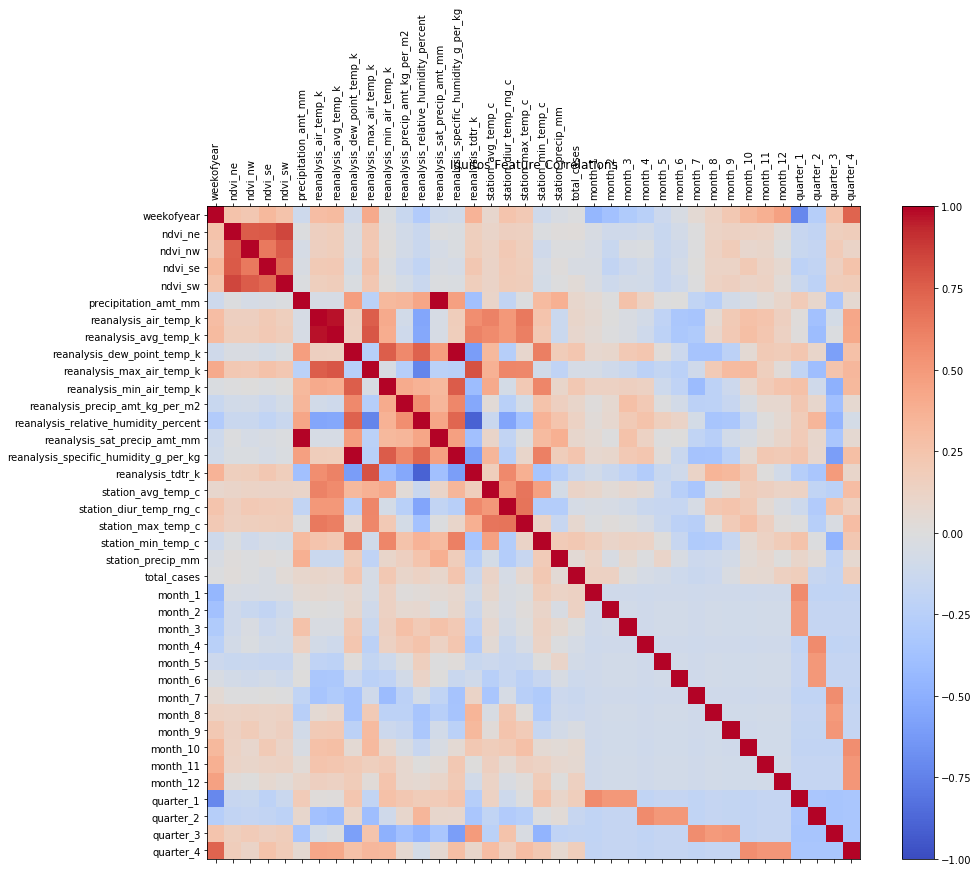

In [46]:
plotVarCorr( dengue_train_iq[dengue_train_iq.columns[2:]], 'Iquitos Feature Correlations' )

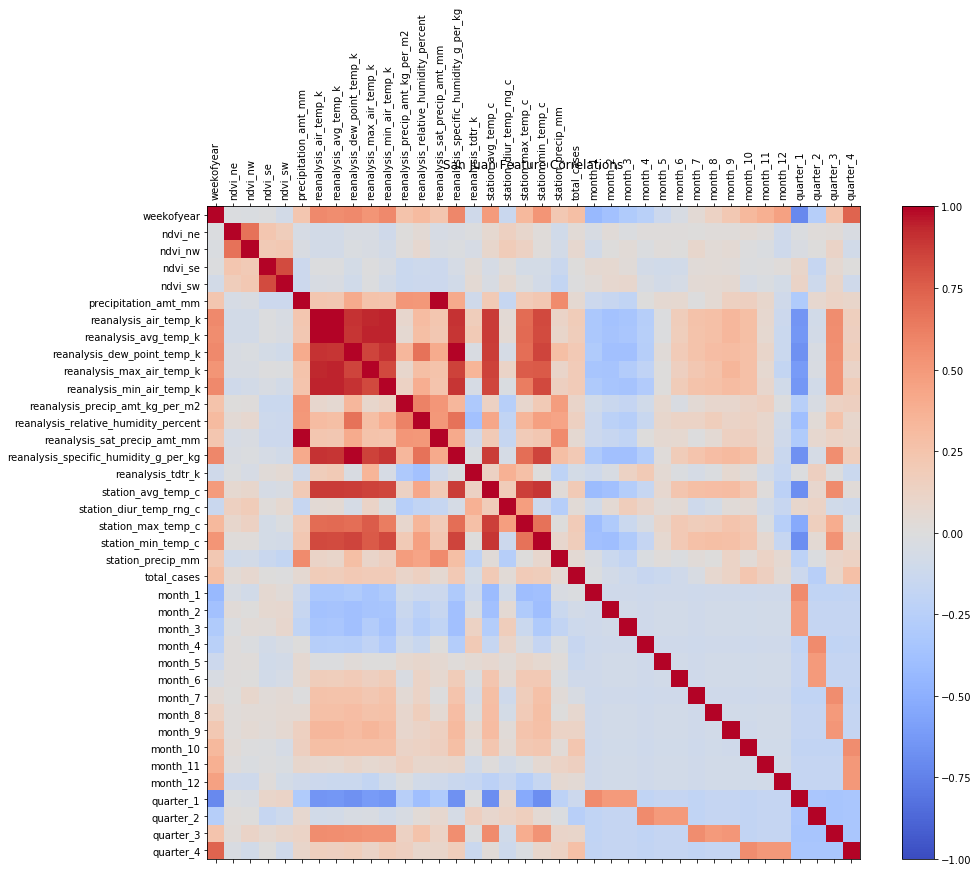

In [47]:
plotVarCorr( dengue_train_sj[dengue_train_sj.columns[2:]] ,'San Juan Feature Correlations' )

In [48]:
dengue_train_iq[dengue_train_iq.columns[2:]].corr()

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
weekofyear,1.000000,0.253895,0.220770,0.321254,0.256479,-0.116018,0.293305,0.305944,-0.100417,0.411810,...,0.047706,0.128739,0.217325,0.321751,0.378674,0.455577,-0.714756,-0.261619,0.248053,0.732162
ndvi_ne,0.253895,1.000000,0.764407,0.767745,0.842784,-0.012388,0.152740,0.167468,-0.031796,0.211516,...,-0.000948,0.120159,0.138786,0.125492,0.123527,0.024529,-0.150944,-0.186252,0.160478,0.175699
ndvi_nw,0.220770,0.764407,1.000000,0.644194,0.764829,-0.060257,0.152423,0.168796,-0.034734,0.203425,...,-0.004164,0.132545,0.184010,0.080947,0.097884,0.000625,-0.146851,-0.164505,0.194443,0.115200
ndvi_se,0.321254,0.767745,0.644194,1.000000,0.714577,-0.043946,0.196518,0.207895,-0.063731,0.260059,...,0.001829,0.119712,0.122527,0.202836,0.121186,0.068013,-0.218471,-0.187106,0.151811,0.252888
ndvi_sw,0.256479,0.842784,0.764829,0.714577,1.000000,-0.020351,0.163954,0.176197,-0.030800,0.226263,...,-0.006466,0.130732,0.154329,0.115531,0.131007,0.035497,-0.139748,-0.214767,0.173029,0.180497
precipitation_amt_mm,-0.116018,-0.012388,-0.060257,-0.043946,-0.020351,1.000000,-0.048534,-0.054303,0.471734,-0.228346,...,-0.193195,-0.246447,-0.080814,-0.042438,0.037287,0.097154,0.191735,0.090480,-0.332399,0.055115
reanalysis_air_temp_k,0.293305,0.152740,0.152423,0.196518,0.163954,-0.048534,1.000000,0.973319,0.151199,0.752356,...,-0.336662,0.051629,0.200354,0.270651,0.247157,0.150287,0.020926,-0.374860,-0.069525,0.427524
reanalysis_avg_temp_k,0.305944,0.167468,0.168796,0.207895,0.176197,-0.054303,0.973319,1.000000,0.142334,0.783955,...,-0.294361,0.081179,0.205570,0.282366,0.228332,0.135209,0.008938,-0.400225,-0.019554,0.414302
reanalysis_dew_point_temp_k,-0.100417,-0.031796,-0.034734,-0.063731,-0.030800,0.471734,0.151199,0.142334,1.000000,-0.253558,...,-0.344968,-0.348870,-0.226026,0.047788,0.200176,0.182919,0.234285,0.094366,-0.589423,0.269749
reanalysis_max_air_temp_k,0.411810,0.211516,0.203425,0.260059,0.226263,-0.228346,0.752356,0.783955,-0.253558,1.000000,...,-0.094491,0.195404,0.305849,0.320297,0.163745,0.025236,-0.184613,-0.396702,0.248821,0.331270


In [49]:
dengue_train_sj[dengue_train_sj.columns[2:]].corr()

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
weekofyear,1.000000,-0.020271,-0.023549,-0.009380,-0.075804,0.231961,0.575381,0.561001,0.578072,0.519083,...,0.045792,0.127052,0.212786,0.321908,0.377005,0.453914,-0.704628,-0.265032,0.242219,0.730285
ndvi_ne,-0.020271,1.000000,0.673037,0.234049,0.177792,-0.048727,-0.073170,-0.071176,-0.040008,-0.044553,...,0.003614,0.020443,0.022208,0.036176,0.008160,-0.100291,-0.020363,0.022587,0.028906,-0.032410
ndvi_nw,-0.023549,0.673037,1.000000,0.196343,0.214615,-0.032351,-0.077457,-0.076375,-0.026070,-0.046189,...,0.087629,0.033488,0.046979,-0.000145,-0.030126,-0.105100,-0.031415,0.002708,0.109504,-0.083588
ndvi_se,-0.009380,0.234049,0.196343,1.000000,0.821354,-0.119386,-0.014601,-0.011905,-0.062773,-0.007382,...,0.031022,0.032939,0.030050,-0.008832,-0.006978,0.017297,0.096125,-0.156275,0.060131,0.000465
ndvi_sw,-0.075804,0.177792,0.214615,0.821354,1.000000,-0.118752,-0.043488,-0.035999,-0.087787,-0.014890,...,0.041706,0.047021,0.061525,-0.060782,-0.028581,-0.068831,0.114494,-0.111713,0.095747,-0.100637
precipitation_amt_mm,0.231961,-0.048727,-0.032351,-0.119386,-0.118752,1.000000,0.233912,0.222311,0.402744,0.256677,...,-0.005076,0.052633,0.143464,0.155530,0.086269,-0.097415,-0.295752,0.075313,0.118906,0.097560
reanalysis_air_temp_k,0.575381,-0.073170,-0.077457,-0.014601,-0.043488,0.233912,1.000000,0.997495,0.903287,0.935089,...,0.259197,0.280308,0.332299,0.286262,0.072734,-0.121260,-0.646907,-0.078919,0.555888,0.162149
reanalysis_avg_temp_k,0.561001,-0.071176,-0.076375,-0.011905,-0.035999,0.222311,0.997495,1.000000,0.895123,0.938952,...,0.255965,0.278177,0.331563,0.281409,0.066577,-0.128979,-0.635781,-0.074183,0.551931,0.150295
reanalysis_dew_point_temp_k,0.578072,-0.040008,-0.026070,-0.062773,-0.087787,0.402744,0.903287,0.895123,1.000000,0.847236,...,0.254652,0.290879,0.304519,0.277619,0.094899,-0.130627,-0.667489,-0.046503,0.541844,0.164274
reanalysis_max_air_temp_k,0.519083,-0.044553,-0.046189,-0.007382,-0.014890,0.256677,0.935089,0.938952,0.847236,1.000000,...,0.223454,0.264713,0.338444,0.274054,0.067742,-0.176555,-0.612312,-0.037857,0.525978,0.116608


###### As per the feature correlation analysis, some feature are correlated more than 90%. so we can drop one of them
###### Iquitos data
1. Features  “precipitation_amount_mm”     and “reanalysis_sat_precip_amt_mm”          were found to be 100% correlated.
2. Features  “reanalysis_dew_point_temp_k” and “reanalysis_specific_humidity_g_per_kg” were found to be  99.77% correlated.
3. Features  “reanalysis_avg_temp_k”       and “reanalysis_air_temp_k”                 were found to be  97.33% correlated.

###### San Juan data
1. Features  “precipitation_amount_mm”     and “reanalysis_sat_precip_amt_mm”          were found to be 100% correlated.
2. Features  “reanalysis_dew_point_temp_k” and “reanalysis_specific_humidity_g_per_kg” were found to be  99.85% correlated.
3. Features  “reanalysis_avg_temp_k”       and “reanalysis_air_temp_k”                 were found to be  99.75% correlated.
4. Features  “reanalysis_max_air_temp_k”   and “reanalysis_avg_temp_k”                 were found to be  93.89% correlated.
5. Features  “reanalysis_min_air_temp_k”   and “reanalysis_avg_temp_k”                 were found to be  93.91% correlated.
6. Features  "reanalysis_dew_point_temp_k" and “reanalysis_air_temp_k”                 were found to be  90.33% correlated.

Based on the value reanalysis, we will decide feature deletion

##### Precipitation features
##### station_precip_mm column

In [50]:
dengue_train_iq.station_precip_mm.describe()

count    504.000000
mean      62.467262
std       63.245958
min        0.000000
25%       17.200000
50%       45.300000
75%       85.950000
max      543.300000
Name: station_precip_mm, dtype: float64

In [51]:
dengue_train_sj.station_precip_mm.describe()

count    930.000000
mean      26.785484
std       29.325811
min        0.000000
25%        6.825000
50%       17.750000
75%       35.450000
max      305.900000
Name: station_precip_mm, dtype: float64

- In Iquitos, station_precip_mm column contains 504 entries, 16 missing entries
- In San Juan, station_precip_mm column contains 930 entries, 6 missing entries
- Datatype is float64

In [52]:
# No need to convert the datatype. chnaging it to float16, will change the number little bit beacuse of decimal point
# now we will check the missing values
dengue_train_iq[dengue_train_iq.columns[6:-16]][dengue_train_iq['station_precip_mm'].isnull()]

,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,
2000-11-25,0.170917,55.91,300.872857,301.914286,293.060000,311.1,293.6,11.20,66.042857,55.91,14.768571,13.142857,27.700,11.350000,36.5,21.5,NaN,0
2001-08-06,0.204357,0.00,298.537143,300.135714,291.387143,308.7,291.0,0.20,66.664286,0.00,13.158571,14.642857,27.100,12.175000,33.5,17.8,NaN,0
2002-04-16,0.194943,109.49,297.764286,298.921429,296.310000,305.0,294.4,49.80,92.615714,109.49,17.935714,6.728571,27.200,13.000000,34.6,20.3,NaN,18
2004-01-01,0.187957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2005-10-01,0.421086,29.80,301.175714,302.928571,293.752857,314.0,294.8,4.20,67.212857,29.80,15.331429,14.828571,28.650,13.500000,37.1,20.7,NaN,2
2006-12-17,0.414786,157.75,298.158571,299.071429,297.351429,304.4,294.2,63.00,95.875714,157.75,19.111429,6.400000,NaN,NaN,33.8,NaN,NaN,0
2006-12-24,0.352950,111.48,297.680000,298.985714,296.725714,306.7,294.3,80.20,95.078571,111.48,18.358571,6.542857,NaN,NaN,32.9,23.5,NaN,1
2007-07-02,0.209943,1.59,296.828571,298.114286,292.177143,305.8,290.2,1.40,78.074286,1.59,13.804286,12.228571,25.900,10.566667,32.0,19.6,NaN,3


In [53]:
# to fix the missing values, first we will do the interpolation.
dengue_train_iq['station_precip_mm'].interpolate( inplace = True )
dengue_train_sj['station_precip_mm'].interpolate( inplace = True )

###### precipitation_amount_mm and reanalysis_sat_precip_amt_mm column

In [54]:
# as per correlation, precipitation_amount_mm and reanalysis_sat_precip_amt_mm are same.
dengue_train_sj.drop( columns='reanalysis_sat_precip_amt_mm', inplace=True)
dengue_train_iq.drop( columns='reanalysis_sat_precip_amt_mm', inplace=True)

In [55]:
# Checking missing values
dengue_train_iq[dengue_train_iq['precipitation_amt_mm'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,iq,2004,1,0.202571,0.198967,0.244557,0.187957,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,iq,2005,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2009-01-01,iq,2009,1,0.151286,0.161686,0.153271,0.119443,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2010-01-01,iq,2010,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [56]:
# as per the data analysis, interpolation is good to fix the missing entries
dengue_train_iq['precipitation_amt_mm'].interpolate( inplace = True )
dengue_train_sj['precipitation_amt_mm'].interpolate( inplace = True )

##### reanalysis_precip_amt_kg_per_m2 column
- In Iquitos, reanalysis_precip_amt_kg_per_m2 column contains 516 entries, 4 missing entries
- In San Juan, reanalysis_precip_amt_kg_per_m2 column contains 927 entries, 9 missing entries

In [57]:
# Checking missing values
dengue_train_iq[dengue_train_iq['reanalysis_precip_amt_kg_per_m2'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,iq,2004,1,0.202571,0.198967,0.244557,0.187957,63.975,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,iq,2005,53,NaN,NaN,NaN,NaN,90.215,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2009-01-01,iq,2009,1,0.151286,0.161686,0.153271,0.119443,53.695,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2010-01-01,iq,2010,53,NaN,NaN,NaN,NaN,62.915,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [58]:
dengue_train_sj[dengue_train_sj['reanalysis_precip_amt_kg_per_m2'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
1992-01-01,sj,1992,1,0.1251,0.157867,0.185283,0.181367,100.425,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1993-01-01,sj,1993,53,NaN,NaN,NaN,NaN,23.395,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1998-01-01,sj,1998,1,0.0455,0.047800,0.123986,0.083443,16.555,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1999-01-01,sj,1999,53,NaN,NaN,NaN,NaN,22.695,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2004-01-01,sj,2004,1,-0.2683,-0.123700,0.223757,0.176543,0.980,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,sj,2005,53,NaN,NaN,NaN,NaN,75.155,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [59]:
# look like, the data is missing in the similar way as precipitation_amt_mm
dengue_train_iq['reanalysis_precip_amt_kg_per_m2'].interpolate( inplace = True )
dengue_train_sj['reanalysis_precip_amt_kg_per_m2'].interpolate( inplace = True )

#### humidity feature analysis
1. reanalysis_relative_humidity_percent – Mean relative humidity
2. reanalysis_specific_humidity_g_per_kg – Mean specific humidity

###### reanalysis_relative_humidity_percent column
- In Iquitos, reanalysis_relative_humidity_percent column contains 516 entries, 4 missing entries.
- In San Juan, reanalysis_relative_humidity_percent column contains 930 entries, 6 missing entries.

In [60]:
# Checking missing values
dengue_train_iq[dengue_train_iq['reanalysis_relative_humidity_percent'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,iq,2004,1,0.202571,0.198967,0.244557,0.187957,63.975,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,iq,2005,53,NaN,NaN,NaN,NaN,90.215,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2009-01-01,iq,2009,1,0.151286,0.161686,0.153271,0.119443,53.695,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2010-01-01,iq,2010,53,NaN,NaN,NaN,NaN,62.915,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [61]:
dengue_train_sj[dengue_train_sj['reanalysis_relative_humidity_percent'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
1992-01-01,sj,1992,1,0.1251,0.157867,0.185283,0.181367,100.425,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1993-01-01,sj,1993,53,NaN,NaN,NaN,NaN,23.395,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1998-01-01,sj,1998,1,0.0455,0.047800,0.123986,0.083443,16.555,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1999-01-01,sj,1999,53,NaN,NaN,NaN,NaN,22.695,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2004-01-01,sj,2004,1,-0.2683,-0.123700,0.223757,0.176543,0.980,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,sj,2005,53,NaN,NaN,NaN,NaN,75.155,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [62]:
# look like, the data is missing in the similar way as precipitation_amt_mm
dengue_train_iq['reanalysis_relative_humidity_percent'].interpolate( inplace = True )
dengue_train_sj['reanalysis_relative_humidity_percent'].interpolate( inplace = True )

##### reanalysis_specific_humidity_g_per_kg column
1. In Iquitos, reanalysis_specific_humidity_g_per_kg column contains 516 entries, 4 missing entries.
2. In San Juan, reanalysis_specific_humidity_g_per_kg column contains 930 entries, 6 missing entries.

Features “reanalysis_dew_point_temp_k” and “reanalysis_specific_humidity_g_per_kg” were found to be 99.77% correlated.
As per the correlation with the target variable, reanalysis_specific_humidity_g_per_kg is more correlated than  reanalysis_dew_point_temp_k. So we are dropping reanalysis_dew_point_temp_k feature.

In [63]:
dengue_train_sj.drop( columns='reanalysis_dew_point_temp_k', inplace=True)
dengue_train_iq.drop( columns='reanalysis_dew_point_temp_k', inplace=True)

In [64]:
dengue_train_sj[dengue_train_sj['reanalysis_specific_humidity_g_per_kg'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
1992-01-01,sj,1992,1,0.1251,0.157867,0.185283,0.181367,100.425,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1993-01-01,sj,1993,53,NaN,NaN,NaN,NaN,23.395,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1998-01-01,sj,1998,1,0.0455,0.047800,0.123986,0.083443,16.555,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1999-01-01,sj,1999,53,NaN,NaN,NaN,NaN,22.695,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2004-01-01,sj,2004,1,-0.2683,-0.123700,0.223757,0.176543,0.980,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,sj,2005,53,NaN,NaN,NaN,NaN,75.155,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [65]:
dengue_train_iq[dengue_train_iq['reanalysis_specific_humidity_g_per_kg'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,iq,2004,1,0.202571,0.198967,0.244557,0.187957,63.975,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,iq,2005,53,NaN,NaN,NaN,NaN,90.215,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2009-01-01,iq,2009,1,0.151286,0.161686,0.153271,0.119443,53.695,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2010-01-01,iq,2010,53,NaN,NaN,NaN,NaN,62.915,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [66]:
# look like, the data is missing in the similar way as precipitation_amt_mm( not continious numbers ). Interpolate is required to fix the missing entries
dengue_train_iq['reanalysis_specific_humidity_g_per_kg'].interpolate( inplace = True )
dengue_train_sj['reanalysis_specific_humidity_g_per_kg'].interpolate( inplace = True )

##### Temperature feature analysis

###### reanalysis_avg_temp_k column

In [67]:
dengue_train_sj[dengue_train_sj['reanalysis_avg_temp_k'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
1992-01-01,sj,1992,1,0.1251,0.157867,0.185283,0.181367,100.425,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1993-01-01,sj,1993,53,NaN,NaN,NaN,NaN,23.395,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1998-01-01,sj,1998,1,0.0455,0.047800,0.123986,0.083443,16.555,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1999-01-01,sj,1999,53,NaN,NaN,NaN,NaN,22.695,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2004-01-01,sj,2004,1,-0.2683,-0.123700,0.223757,0.176543,0.980,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,sj,2005,53,NaN,NaN,NaN,NaN,75.155,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [68]:
dengue_train_iq[dengue_train_iq['reanalysis_avg_temp_k'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,iq,2004,1,0.202571,0.198967,0.244557,0.187957,63.975,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,iq,2005,53,NaN,NaN,NaN,NaN,90.215,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2009-01-01,iq,2009,1,0.151286,0.161686,0.153271,0.119443,53.695,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2010-01-01,iq,2010,53,NaN,NaN,NaN,NaN,62.915,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


Iquitos  : 
1. Features “reanalysis_avg_temp_k” and “reanalysis_air_temp_k” were found to be 97.33% correlated.

San Juan : 
1. Features “reanalysis_max_air_temp_k” and “reanalysis_avg_temp_k” were found to be 93.89% correlated.
2. Features “reanalysis_min_air_temp_k” and “reanalysis_avg_temp_k” were found to be 93.91% correlated.

As per correlation, reanalysis_avg_temp_k is less correlated to target compared. And the missing entries count also similar to other features. So we can delete 'reanalysis_avg_temp_k' feature. 

In [69]:
dengue_train_sj.drop( columns='reanalysis_avg_temp_k', inplace=True)
dengue_train_iq.drop( columns='reanalysis_avg_temp_k', inplace=True)

###### reanalysis_air_temp_k  column
- In Iquitos, reanalysis_air_temp_k column contains 516 entries, 4 missing entries.
- In San Juan, reanalysis_air_temp_k column contains 930 entries, 6 missing entries.

In [70]:
# Checking missing values
dengue_train_iq[dengue_train_iq['reanalysis_air_temp_k'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_max_air_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,iq,2004,1,0.202571,0.198967,0.244557,0.187957,63.975,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,iq,2005,53,NaN,NaN,NaN,NaN,90.215,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2009-01-01,iq,2009,1,0.151286,0.161686,0.153271,0.119443,53.695,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2010-01-01,iq,2010,53,NaN,NaN,NaN,NaN,62.915,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [71]:
dengue_train_sj[dengue_train_sj['reanalysis_air_temp_k'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_max_air_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
1992-01-01,sj,1992,1,0.1251,0.157867,0.185283,0.181367,100.425,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1993-01-01,sj,1993,53,NaN,NaN,NaN,NaN,23.395,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1998-01-01,sj,1998,1,0.0455,0.047800,0.123986,0.083443,16.555,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1999-01-01,sj,1999,53,NaN,NaN,NaN,NaN,22.695,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2004-01-01,sj,2004,1,-0.2683,-0.123700,0.223757,0.176543,0.980,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,sj,2005,53,NaN,NaN,NaN,NaN,75.155,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [72]:
# look like, the data is missing in the similar way as precipitation_amt_mm( not continious numbers ). Interpolate is required to fix the missing entries
dengue_train_iq['reanalysis_air_temp_k'].interpolate( inplace = True )
dengue_train_sj['reanalysis_air_temp_k'].interpolate( inplace = True )

###### reanalysis_max_air_temp_k  column
- In Iquitos, reanalysis_max_air_temp_k column contains 516 entries, 4 missing entries.
- In San Juan, reanalysis_max_air_temp_k column contains 930 entries, 6 missing entries.

In [73]:
# checking missing entries format
dengue_train_sj[dengue_train_sj['reanalysis_max_air_temp_k'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_max_air_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
1992-01-01,sj,1992,1,0.1251,0.157867,0.185283,0.181367,100.425,297.217143,NaN,...,0,0,0,0,0,0,1,0,0,0
1993-01-01,sj,1993,53,NaN,NaN,NaN,NaN,23.395,297.320000,NaN,...,0,0,0,0,0,0,1,0,0,0
1998-01-01,sj,1998,1,0.0455,0.047800,0.123986,0.083443,16.555,299.020714,NaN,...,0,0,0,0,0,0,1,0,0,0
1999-01-01,sj,1999,53,NaN,NaN,NaN,NaN,22.695,298.991429,NaN,...,0,0,0,0,0,0,1,0,0,0
2004-01-01,sj,2004,1,-0.2683,-0.123700,0.223757,0.176543,0.980,298.346429,NaN,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,sj,2005,53,NaN,NaN,NaN,NaN,75.155,298.135000,NaN,...,0,0,0,0,0,0,1,0,0,0


In [74]:
# Like reanalysis_air_temp_k, missing values are updated using interpolation
dengue_train_iq['reanalysis_max_air_temp_k'].interpolate( inplace = True )
dengue_train_sj['reanalysis_max_air_temp_k'].interpolate( inplace = True )

###### reanalysis_min_air_temp_k  column

In [75]:
# checking missing entries format
dengue_train_sj[dengue_train_sj['reanalysis_min_air_temp_k'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_max_air_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
1992-01-01,sj,1992,1,0.1251,0.157867,0.185283,0.181367,100.425,297.217143,299.80,...,0,0,0,0,0,0,1,0,0,0
1993-01-01,sj,1993,53,NaN,NaN,NaN,NaN,23.395,297.320000,299.25,...,0,0,0,0,0,0,1,0,0,0
1998-01-01,sj,1998,1,0.0455,0.047800,0.123986,0.083443,16.555,299.020714,301.20,...,0,0,0,0,0,0,1,0,0,0
1999-01-01,sj,1999,53,NaN,NaN,NaN,NaN,22.695,298.991429,301.05,...,0,0,0,0,0,0,1,0,0,0
2004-01-01,sj,2004,1,-0.2683,-0.123700,0.223757,0.176543,0.980,298.346429,300.05,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,sj,2005,53,NaN,NaN,NaN,NaN,75.155,298.135000,300.20,...,0,0,0,0,0,0,1,0,0,0


In [76]:
# setting missing values
dengue_train_iq['reanalysis_min_air_temp_k'].interpolate( inplace = True )
dengue_train_sj['reanalysis_min_air_temp_k'].interpolate( inplace = True )

###### reanalysis_tdtr_k  column

In [77]:
dengue_train_iq[dengue_train_iq['reanalysis_tdtr_k'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_max_air_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,iq,2004,1,0.202571,0.198967,0.244557,0.187957,63.975,296.867143,303.30,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,iq,2005,53,NaN,NaN,NaN,NaN,90.215,298.283571,307.10,...,0,0,0,0,0,0,1,0,0,0
2009-01-01,iq,2009,1,0.151286,0.161686,0.153271,0.119443,53.695,298.641429,306.45,...,0,0,0,0,0,0,1,0,0,0
2010-01-01,iq,2010,53,NaN,NaN,NaN,NaN,62.915,298.222857,305.75,...,0,0,0,0,0,0,1,0,0,0


In [78]:
# setting missing values
dengue_train_iq['reanalysis_tdtr_k'].interpolate( inplace = True )
dengue_train_sj['reanalysis_tdtr_k'].interpolate( inplace = True )

###### Unit conversion( Kelvin to Celsius )
To set same type of units for all similar features, Temperatures in Kelvin are converted to Celsius using the equation
TemperatureCelsius = TemperatureKelvin – 273.15

In [79]:
dengue_train_iq.reanalysis_tdtr_k.describe()

count    520.000000
mean       9.196126
std        2.445870
min        3.714286
25%        7.371429
50%        8.957143
75%       11.003571
max       16.028571
Name: reanalysis_tdtr_k, dtype: float64

reanalysis_tdtr_k is the diurnal temperature range (DTR). This is the difference between the daily maximum and minimum temperature. So no conversion is required.

In [80]:
k_to_c_conversion_factor = 273.15
dengue_train_iq['reanalysis_min_air_temp_k'] = dengue_train_iq['reanalysis_min_air_temp_k'] - k_to_c_conversion_factor
dengue_train_sj['reanalysis_min_air_temp_k'] = dengue_train_sj['reanalysis_min_air_temp_k'] - k_to_c_conversion_factor
dengue_train_iq['reanalysis_max_air_temp_k'] = dengue_train_iq['reanalysis_max_air_temp_k'] - k_to_c_conversion_factor
dengue_train_sj['reanalysis_max_air_temp_k'] = dengue_train_sj['reanalysis_max_air_temp_k'] - k_to_c_conversion_factor
dengue_train_iq['reanalysis_air_temp_k'] = dengue_train_iq['reanalysis_air_temp_k'] - k_to_c_conversion_factor
dengue_train_sj['reanalysis_air_temp_k'] = dengue_train_sj['reanalysis_air_temp_k'] - k_to_c_conversion_factor

In [81]:
dengue_train_iq.columns

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'quarter_1',
       'quarter_2', 'quarter_3', 'quarter_4'],
      dtype='object')

In [82]:
# updating column names after unit conversion
new_col = ['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_c',
       'reanalysis_max_air_temp_c', 'reanalysis_min_air_temp_c',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_c',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'quarter_1',
       'quarter_2', 'quarter_3', 'quarter_4']
dengue_train_iq.columns = new_col
dengue_train_sj.columns = new_col

station_avg_temp_c                       483 non-null float64
station_diur_temp_rng_c                  483 non-null float64
station_max_temp_c                       506 non-null float64
station_min_temp_c                       512 non-null float64

station_avg_temp_c                       930 non-null float64
station_diur_temp_rng_c                  930 non-null float64
station_max_temp_c                       930 non-null float64
station_min_temp_c                       930 non-null float64

##### station_min_temp_c column
- In Iquitos, station_min_temp_c column contains 512 entries, 8 missing entries.
- In San Juan, station_min_temp_c column contains 930 entries, 6 missing entries.

In [83]:
dengue_train_iq[dengue_train_iq['station_min_temp_c'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_max_air_temp_c,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
2001-05-14,iq,2001,20,0.315343,0.319650,0.262700,0.303486,74.080,24.147143,32.45,...,0,0,0,0,0,0,0,1,0,0
2004-01-01,iq,2004,1,0.202571,0.198967,0.244557,0.187957,63.975,23.717143,30.15,...,0,0,0,0,0,0,1,0,0,0
2004-12-09,iq,2004,50,0.323429,0.309514,0.275829,0.335900,70.040,24.637143,32.65,...,0,0,0,0,0,1,0,0,0,1
2005-01-01,iq,2005,53,NaN,NaN,NaN,NaN,90.215,25.133571,33.95,...,0,0,0,0,0,0,1,0,0,0
2005-09-17,iq,2005,37,0.239429,0.214871,0.239043,0.227600,18.660,25.730000,34.15,...,0,0,1,0,0,0,0,0,1,0
2006-12-17,iq,2006,50,0.378500,0.302033,0.349229,0.414786,157.750,25.008571,31.25,...,0,0,0,0,0,1,0,0,0,1
2009-01-01,iq,2009,1,0.151286,0.161686,0.153271,0.119443,53.695,25.491429,33.30,...,0,0,0,0,0,0,1,0,0,0
2010-01-01,iq,2010,53,NaN,NaN,NaN,NaN,62.915,25.072857,32.60,...,0,0,0,0,0,0,1,0,0,0


The station_min_temp_c missing entries are not continious. so interpolation will update the missing entries. If  station_avg_temp_c is available, we can calculate based on that.But station_min_temp_c missing cases, station_avg_temp_c also missing

In [84]:
# setting missing values
dengue_train_iq['station_min_temp_c'].interpolate( inplace = True )
dengue_train_sj['station_min_temp_c'].interpolate( inplace = True )

##### station_max_temp_c column
- In Iquitos, station_max_temp_c column contains 506 entries, 14 missing entries.
- In San Juan, station_max_temp_c column contains 930 entries, 6 missing entries.

In [85]:
dengue_train_iq[dengue_train_iq['station_max_temp_c'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_max_air_temp_c,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,iq,2004,1,0.202571,0.198967,0.244557,0.187957,63.975,23.717143,30.15,...,0,0,0,0,0,0,1,0,0,0
2004-08-19,iq,2004,34,0.393129,0.328643,0.276771,0.388514,23.780,24.670000,35.15,...,0,1,0,0,0,0,0,0,1,0
2004-12-09,iq,2004,50,0.323429,0.309514,0.275829,0.335900,70.040,24.637143,32.65,...,0,0,0,0,0,1,0,0,0,1
2005-01-01,iq,2005,53,NaN,NaN,NaN,NaN,90.215,25.133571,33.95,...,0,0,0,0,0,0,1,0,0,0
2005-09-10,iq,2005,36,0.335429,0.200714,0.322886,0.309143,36.980,26.908571,36.15,...,0,0,1,0,0,0,0,0,1,0
2005-09-17,iq,2005,37,0.239429,0.214871,0.239043,0.227600,18.660,25.730000,34.15,...,0,0,1,0,0,0,0,0,1,0
2008-06-10,iq,2008,24,0.293743,0.264367,0.246629,0.291957,13.270,23.037143,32.65,...,0,0,0,0,0,0,0,1,0,0
2008-06-17,iq,2008,25,0.224029,0.175471,0.265657,0.245214,111.180,23.592857,31.25,...,0,0,0,0,0,0,0,1,0,0
2008-06-24,iq,2008,26,0.197043,0.277983,0.213943,0.265614,89.880,23.308571,31.65,...,0,0,0,0,0,0,0,1,0,0


In [86]:
dengue_train_sj[dengue_train_sj['station_max_temp_c'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_max_air_temp_c,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
1992-01-01,sj,1992,1,0.1251,0.157867,0.185283,0.181367,100.425,24.067143,26.65,...,0,0,0,0,0,0,1,0,0,0
1993-01-01,sj,1993,53,NaN,NaN,NaN,NaN,23.395,24.170000,26.10,...,0,0,0,0,0,0,1,0,0,0
1998-01-01,sj,1998,1,0.0455,0.047800,0.123986,0.083443,16.555,25.870714,28.05,...,0,0,0,0,0,0,1,0,0,0
1999-01-01,sj,1999,53,NaN,NaN,NaN,NaN,22.695,25.841429,27.90,...,0,0,0,0,0,0,1,0,0,0
2004-01-01,sj,2004,1,-0.2683,-0.123700,0.223757,0.176543,0.980,25.196429,26.90,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,sj,2005,53,NaN,NaN,NaN,NaN,75.155,24.985000,27.05,...,0,0,0,0,0,0,1,0,0,0


In [87]:
# setting missing values
dengue_train_iq['station_max_temp_c'].interpolate( inplace = True )
dengue_train_sj['station_max_temp_c'].interpolate( inplace = True )

In [88]:
col = ['station_max_temp_c', 'station_min_temp_c']
count = 0
for idx, row in dengue_train_iq[col].iterrows():
    if row.station_max_temp_c <= row.station_min_temp_c:
        print(" error in data", idx )
        count = count + 1
print( count )
count = 0
for idx, row in dengue_train_sj[col].iterrows():
    if row.station_max_temp_c <= row.station_min_temp_c:
        print(" error in data", idx )
        count = count + 1
print( count )

0
0


###### station_diur_temp_rng_c column
- In Iquitos, station_diur_temp_rng_c column contains 483 entries, 37 missing entries.
- In San Juan, station_diur_temp_rng_c column contains 930 entries, 6 missing entries.


In [89]:
dengue_train_sj[['reanalysis_tdtr_c',	'station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c']][dengue_train_sj['station_diur_temp_rng_c'].isnull()]

,reanalysis_tdtr_c,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c
week_start_date,,,,
1992-01-01,2.257143,NaN,NaN,29.45
1993-01-01,1.914286,NaN,NaN,30.00
1998-01-01,2.364286,NaN,NaN,31.70
1999-01-01,2.278571,NaN,NaN,29.45
2004-01-01,2.364286,NaN,NaN,28.90
2005-01-01,2.007143,NaN,NaN,29.15


In [90]:
dengue_train_iq[dengue_train_iq['station_diur_temp_rng_c'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_max_air_temp_c,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
2001-05-14,iq,2001,20,0.315343,0.319650,0.262700,0.303486,74.080,24.147143,32.45,...,0,0,0,0,0,0,0,1,0,0
2001-06-25,iq,2001,26,0.192300,0.275286,0.316457,0.325414,1.220,21.695714,32.95,...,0,0,0,0,0,0,0,1,0,0
2002-04-30,iq,2002,18,0.170357,0.141829,0.197729,0.257071,60.050,24.258571,30.65,...,0,0,0,0,0,0,0,1,0,0
2002-08-20,iq,2002,34,0.345425,0.313540,0.295050,0.309267,31.710,23.034286,35.45,...,0,1,0,0,0,0,0,0,1,0
2002-10-29,iq,2002,44,0.329086,0.286214,0.294057,0.315929,89.770,25.368571,34.15,...,0,0,0,1,0,0,0,0,0,1
2003-02-19,iq,2003,8,0.126257,0.135514,0.103657,0.133714,25.030,25.417143,35.45,...,0,0,0,0,0,0,1,0,0,0
2004-01-01,iq,2004,1,0.202571,0.198967,0.244557,0.187957,63.975,23.717143,30.15,...,0,0,0,0,0,0,1,0,0,0
2004-05-27,iq,2004,22,0.190314,0.077843,0.193171,0.102329,35.430,24.155714,33.25,...,0,0,0,0,0,0,0,1,0,0
2004-07-29,iq,2004,31,0.208900,0.155500,0.220300,0.254257,85.960,22.867143,32.95,...,1,0,0,0,0,0,0,0,1,0


In [91]:
# setting missing values. 
# In Iquitos, some continious missing entries are there. but still interpolate will fix it
dengue_train_iq['station_diur_temp_rng_c'].interpolate( inplace = True )
dengue_train_sj['station_diur_temp_rng_c'].interpolate( inplace = True )

###### station_avg_temp_c   column
- In Iquitos, station_diur_temp_rng_c column contains 483 entries, 37 missing entries.
- In San Juan, station_diur_temp_rng_c column contains 930 entries, 6 missing entries.

In [92]:
dengue_train_sj[dengue_train_sj['station_avg_temp_c'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_max_air_temp_c,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
1992-01-01,sj,1992,1,0.1251,0.157867,0.185283,0.181367,100.425,24.067143,26.65,...,0,0,0,0,0,0,1,0,0,0
1993-01-01,sj,1993,53,NaN,NaN,NaN,NaN,23.395,24.170000,26.10,...,0,0,0,0,0,0,1,0,0,0
1998-01-01,sj,1998,1,0.0455,0.047800,0.123986,0.083443,16.555,25.870714,28.05,...,0,0,0,0,0,0,1,0,0,0
1999-01-01,sj,1999,53,NaN,NaN,NaN,NaN,22.695,25.841429,27.90,...,0,0,0,0,0,0,1,0,0,0
2004-01-01,sj,2004,1,-0.2683,-0.123700,0.223757,0.176543,0.980,25.196429,26.90,...,0,0,0,0,0,0,1,0,0,0
2005-01-01,sj,2005,53,NaN,NaN,NaN,NaN,75.155,24.985000,27.05,...,0,0,0,0,0,0,1,0,0,0


In [93]:
#col = ['station_avg_temp_c','station_max_temp_c', 'station_min_temp_c']
#for idx, row in dengue_train_sj[col].iterrows():
#    if pd.isna( row.station_avg_temp_c ):
#        dengue_train_sj.loc[idx,'station_avg_temp_c'] = ( row.station_max_temp_c + row.station_min_temp_c ) / 2
#for idx, row in dengue_train_iq[col].iterrows():
#    if pd.isna( row.station_avg_temp_c ):
#        dengue_train_iq.loc[idx,'station_avg_temp_c'] = ( row.station_max_temp_c + row.station_min_temp_c ) / 2
dengue_train_iq['station_avg_temp_c'].interpolate( inplace = True )
dengue_train_sj['station_avg_temp_c'].interpolate( inplace = True )

##### Satellite vegetation - Normalized difference vegetation index (NDVI) Features
- Missing entries for Iquitos
1. ndvi_ne                                  517 ( missing 3 entries )
2. ndvi_nw                                  517 ( missing 3 entries )
3. ndvi_se                                  517 ( missing 3 entries )
4. ndvi_sw                                  517 ( missing 3 entries )

- Missing entries for San Juan
1. ndvi_ne                                  745 ( missing 191 entries )
2. ndvi_nw                                  887 ( missing 49 entries )
3. ndvi_se                                  917 ( missing 19 entries )
4. ndvi_sw                                  917 ( missing 19 entries )

In [94]:
# setting missing values. 
# In San Juan, some continious missing entries are there. but still interpolate will fix it
dengue_train_iq['ndvi_sw'].interpolate( inplace = True )
dengue_train_sj['ndvi_sw'].interpolate( inplace = True )

In [95]:
dengue_train_sj[dengue_train_sj['ndvi_se'].isnull()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_max_air_temp_c,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
1993-01-01,sj,1993,53,NaN,NaN,NaN,0.059885,23.395,24.170000,26.10,...,0,0,0,0,0,0,1,0,0,0
1994-01-01,sj,1994,52,NaN,NaN,NaN,0.124379,5.250,25.377143,27.85,...,0,0,0,0,0,0,1,0,0,0
1994-09-24,sj,1994,38,NaN,NaN,NaN,0.193049,39.220,26.735714,29.15,...,0,0,1,0,0,0,0,0,1,0
1994-10-01,sj,1994,39,NaN,NaN,NaN,0.193172,55.880,26.358571,28.65,...,0,0,0,1,0,0,0,0,0,1
1994-10-08,sj,1994,40,NaN,NaN,NaN,0.193296,0.630,27.227143,29.35,...,0,0,0,1,0,0,0,0,0,1
1994-10-15,sj,1994,41,NaN,NaN,NaN,0.193419,16.700,26.488571,29.75,...,0,0,0,1,0,0,0,0,0,1
1994-10-22,sj,1994,42,NaN,NaN,NaN,0.193543,75.570,27.088571,29.85,...,0,0,0,1,0,0,0,0,0,1
1994-10-29,sj,1994,43,NaN,NaN,NaN,0.193666,111.520,25.661429,27.35,...,0,0,0,1,0,0,0,0,0,1
1994-11-05,sj,1994,44,NaN,NaN,NaN,0.193790,5.410,26.717143,28.75,...,0,0,0,0,1,0,0,0,0,1


In [96]:
dengue_train_iq['ndvi_ne'].interpolate( inplace = True )
dengue_train_sj['ndvi_ne'].interpolate( inplace = True )
dengue_train_iq['ndvi_nw'].interpolate( inplace = True )
dengue_train_sj['ndvi_nw'].interpolate( inplace = True )
dengue_train_iq['ndvi_se'].interpolate( inplace = True )
dengue_train_sj['ndvi_se'].interpolate( inplace = True )

In [97]:
dengue_train_sj.columns

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_c',
       'reanalysis_max_air_temp_c', 'reanalysis_min_air_temp_c',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_c',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'quarter_1',
       'quarter_2', 'quarter_3', 'quarter_4'],
      dtype='object')

In [98]:
# Declare the columns names
columns = [ 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_c',
       'reanalysis_max_air_temp_c', 'reanalysis_min_air_temp_c',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_c',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm',  'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'quarter_1',
       'quarter_2', 'quarter_3', 'quarter_4']

###### Data Splitting

In [99]:
def split_data( data, split_date ):
    return data[data.index <= split_date].copy(), \
           data[data.index >  split_date].copy()

In [100]:
dengue_train_iq.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_max_air_temp_c,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
week_start_date,,,,,,,,,,,,,,,,,,,,,
2000-07-01,iq,2000,26,0.192886,0.132257,0.340886,0.247200,25.41,23.590000,34.15,...,1,0,0,0,0,0,0,0,1,0
2000-07-08,iq,2000,27,0.216833,0.276100,0.289457,0.241657,60.61,23.484286,33.45,...,1,0,0,0,0,0,0,0,1,0
2000-07-15,iq,2000,28,0.176757,0.173129,0.204114,0.128014,55.52,23.265714,31.35,...,1,0,0,0,0,0,0,0,1,0
2000-07-22,iq,2000,29,0.227729,0.145429,0.254200,0.200314,5.60,22.207143,30.45,...,1,0,0,0,0,0,0,0,1,0
2000-07-29,iq,2000,30,0.328643,0.322129,0.254371,0.361043,62.76,23.282857,33.85,...,1,0,0,0,0,0,0,0,1,0


In [101]:
split_date_iq = '01-Jan-2008'
split_date_sj = '01-Jan-2006'
split_date_sj_start = '12-Dec-1998'
dengue_train_sj_bf_1999, dengue_train_sj_after_1998 = split_data( dengue_train_sj, split_date_sj_start )
#dengue_train_sj_after_1998 = dengue_train_sj;
Iq_train, Iq_test = split_data( dengue_train_iq, split_date_iq )
Sj_train, Sj_test = split_data( dengue_train_sj, split_date_sj )

Sj_train_af_1999, Sj_test_af_1999 = split_data( dengue_train_sj_after_1998, split_date_sj )

In [102]:
X_iq_train = Iq_train
X_iq_test  = Iq_test
y_iq_train = Iq_train['total_cases']
y_iq_test  = Iq_test['total_cases']

X_sj_train = Sj_train
X_sj_test  = Sj_test
y_sj_train = Sj_train['total_cases']
y_sj_test  = Sj_test['total_cases']

X_sj_train_af_1999 = Sj_train_af_1999
X_sj_test_af_1999  = Sj_test_af_1999
y_sj_train_af_1999 = Sj_train_af_1999['total_cases']
y_sj_test_af_1999  = Sj_test_af_1999['total_cases']

X_iq_train.drop( columns = ['city','year','total_cases'], inplace = True )
X_iq_test.drop( columns  = ['city','year','total_cases'], inplace = True )
X_sj_train.drop( columns = ['city','year','total_cases'], inplace = True )
X_sj_test.drop( columns  = ['city','year','total_cases'], inplace = True )
X_sj_train_af_1999.drop( columns = ['city','year','total_cases'], inplace = True )
X_sj_test_af_1999.drop( columns  = ['city','year','total_cases'], inplace = True )

In [103]:
X_sj_train.shape

(816, 34)

In [104]:
X_sj_test.shape

(120, 34)

In [105]:
y_sj_train.shape

(816,)

In [106]:
y_sj_test.shape

(120,)

###### Linear regression

In [107]:
def linearRegression( X_train, y_train, X_test, y_test, normalize = False ):
    if( True == normalize ):
        X_train = RobustScaler().fit_transform( X_train )
        X_test  = RobustScaler().fit_transform( X_test )
    model = LinearRegression()
    model.fit( X_train, y_train )
    pred = model.predict( X_test )
    score = model.score( X_test, y_test )
    return ( mean_absolute_error( y_test, pred ), pred, score )

In [108]:
linReg_sj_MAE, pred_sj, score_sj = linearRegression( X_sj_train, y_sj_train, X_sj_test, y_sj_test )
linReg_iq_MAE, pred_iq, score_iq = linearRegression( X_iq_train, y_iq_train, X_iq_test, y_iq_test )
print( "Linear Regression San Juan MAE :" , linReg_sj_MAE )
print( "Linear Regression Iquitos  MAE :" , linReg_iq_MAE )
linReg_sj_MAE, pred_sj_norm, score_sj  = linearRegression( X_sj_train, y_sj_train, X_sj_test, y_sj_test, True )
linReg_iq_MAE, pred_iq_norm, score_iq  = linearRegression( X_iq_train, y_iq_train, X_iq_test, y_iq_test, True )
print( "Linear Regression San Juan ( Data normalized ) MAE :" , linReg_sj_MAE )
print( "Linear Regression Iquitos  ( Data normalized ) MAE :" , linReg_iq_MAE )

Linear Regression San Juan MAE : 22.29485168497524
Linear Regression Iquitos  MAE : 7.872531327230831
Linear Regression San Juan ( Data normalized ) MAE : 24.85917054655494
Linear Regression Iquitos  ( Data normalized ) MAE : 7.779590608720357


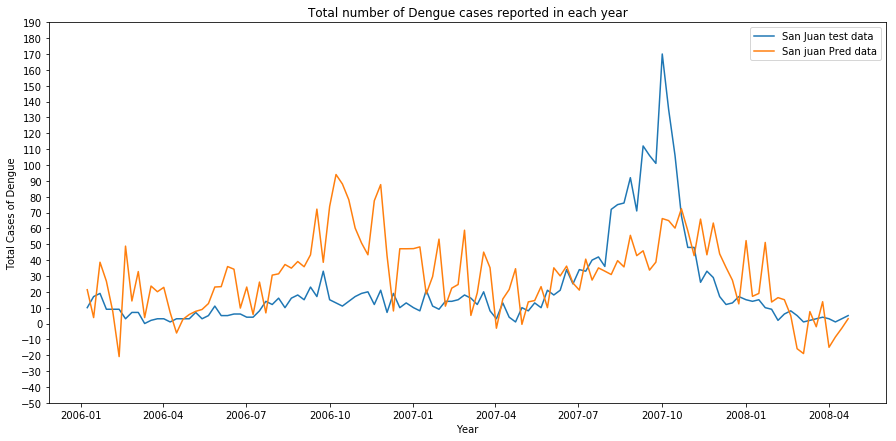

In [109]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( y_sj_test, label='San Juan test data' )
plt.plot( y_sj_test.index, pred_sj, label='San juan Pred data')
plt.yticks(np.arange(-50,200, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

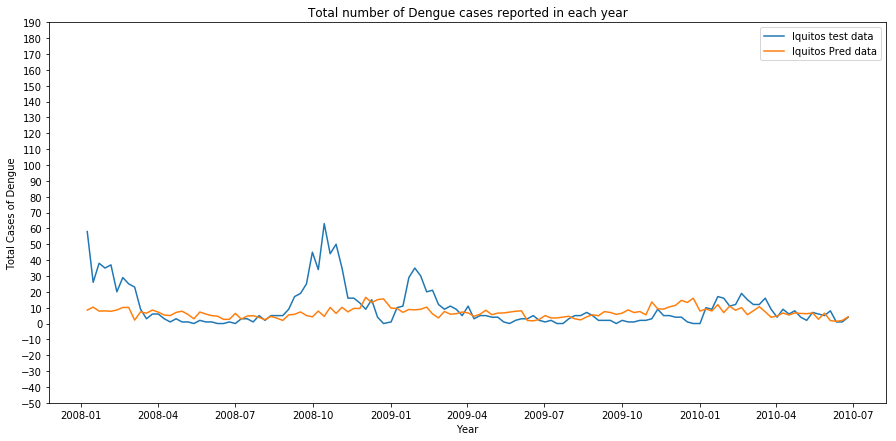

In [110]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( y_iq_test, label='Iquitos test data' )
plt.plot( y_iq_test.index, pred_iq, label='Iquitos Pred data')
plt.yticks(np.arange(-50,200, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

In [111]:
# San Juan data is only from 1999, bz lot of distortions we found on the previous data
linReg_sj_MAE, pred_sj, score_sj  = linearRegression( X_sj_train_af_1999, y_sj_train_af_1999, X_sj_test_af_1999, y_sj_test_af_1999 )
linReg_iq_MAE, pred_iq, score_iq  = linearRegression( X_iq_train, y_iq_train, X_iq_test, y_iq_test )
print( "Linear Regression San Juan MAE :" , linReg_sj_MAE )
print( "Linear Regression Iquitos  MAE :" , linReg_iq_MAE )
linReg_sj_MAE, pred_nor, score_sj  = linearRegression( X_sj_train_af_1999, y_sj_train_af_1999, X_sj_test_af_1999, y_sj_test_af_1999, True )
linReg_iq_MAE, pred    , score_iq  = linearRegression( X_iq_train, y_iq_train, X_iq_test, y_iq_test, True )
print( "Linear Regression San Juan MAE :" , linReg_sj_MAE )
print( "Linear Regression Iquitos  MAE :" , linReg_iq_MAE )

Linear Regression San Juan MAE : 17.023181474650052
Linear Regression Iquitos  MAE : 7.872531327230831
Linear Regression San Juan MAE : 24.378201393821687
Linear Regression Iquitos  MAE : 7.779590608720357


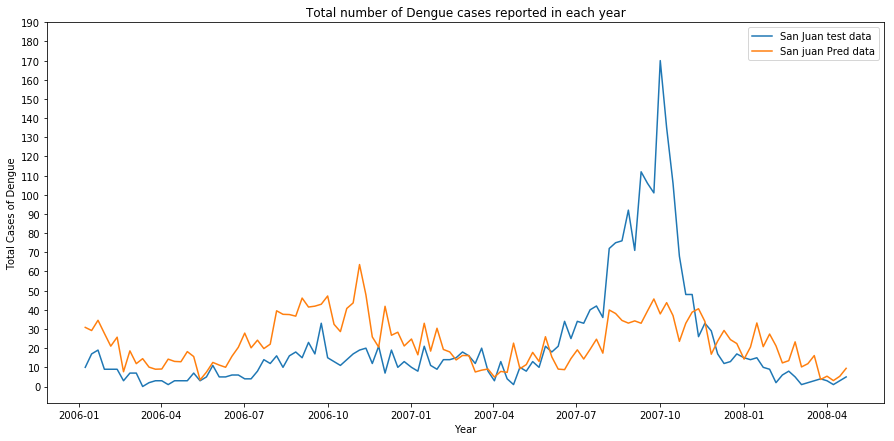

In [112]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( y_sj_test_af_1999, label='San Juan test data' )
plt.plot( y_sj_test_af_1999.index, pred_sj, label='San juan Pred data')
#plt.plot( y_sj_test_af_1999.index, pred_nor, label='San juan Pred data norm')
plt.yticks(np.arange(0,200, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

In [113]:
# using train_test_split. Earlier we split based on date.
X = pd.DataFrame( dengue_train_sj_after_1998 )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_sj_after_1998.total_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
linReg_sj_MAE, pred, score = linearRegression( X_train, y_train, X_test, y_test )
print( "Linear Regression San Juan MAE :" , linReg_sj_MAE )

X = pd.DataFrame( dengue_train_iq )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_iq.total_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

linReg_iq_MAE, pred, score = linearRegression( X_train, y_train, X_test, y_test )
print( "Linear Regression Iquitos MAE :" , linReg_iq_MAE )

Linear Regression San Juan MAE : 15.51697972561732
Linear Regression Iquitos MAE : 5.649698007277179


###### Forward Fearture selection

In [114]:
def forwardFeatureSelection( X_train, y_train, X_test, y_test, columns, show_steps = True ):
    # start with no predictors
    included = []
    # keep track of model and parameters
    best = {'feature': '', 'r2': 0, 'a_r2': 0}
    # create a model object to hold the modelling parameters
    model = LinearRegression() # create a model for Linear Regression
    # get the number of cases in the test data
    n = X_test.shape[0]

    while True:
        changed = False

        if show_steps:
            print('') 

        # list the features to be evaluated
        excluded = list(set(columns) - set(included))

        if show_steps:
            print('(Step) Excluded = %s' % ', '.join(excluded))  

        # for each remaining feature to be evaluated
        for new_column in excluded:

            if show_steps:
                print('(Step) Trying %s...' % new_column)
                print('(Step) - Features = %s' % ', '.join(included + [new_column]))

            # fit the model with the Training data
            fit = model.fit( X_train[ included + [ new_column ]], y_train ) # fit a model; consider which predictors should be included
            # calculate the score (R^2 for Regression)
            r2 = fit.score( X_test[ included + [ new_column]], y_test ) # calculate the score
            # number of predictors in this model
            k = len(included) + 1
            # calculate the adjusted R^2
            adjusted_r2 =  1 - ( ( 1 -  r2 ) * ( n - 1 ) /( n -k - 1 )) # calculate the Adjusted R^2

            if show_steps:
                print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                      (adjusted_r2, best['a_r2']))

            # if model improves
            if adjusted_r2 > best['a_r2']:
                # record new parameters
                best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
                # flag that found a better model
                changed = True
                if show_steps:
                    print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                          (best['feature'], best['r2'], best['a_r2']))
        # END for

        # if found a better model after testing all remaining features
        if changed:
            # update control details
            included.append(best['feature'])
            excluded = list(set(excluded) - set(best['feature']))
            print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
                  (best['feature'], best['r2'], best['a_r2']))
        else:
            # terminate if no better model
            break

    print('')
    print('Resulting features:')
    print(', '.join(included))
    print('R^2 = %.3f and adjusted R^2 = %.3f' % 
                  (best['r2'], best['a_r2']))

In [115]:
X.columns

Index(['weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_c',
       'reanalysis_max_air_temp_c', 'reanalysis_min_air_temp_c',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_c',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'quarter_1', 'quarter_2',
       'quarter_3', 'quarter_4'],
      dtype='object')

In [116]:
X = pd.DataFrame( dengue_train_sj )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_sj.total_cases
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=1)
forwardFeatureSelection( X_train, y_train, X_test, y_test, X.columns )


(Step) Excluded = ndvi_nw, month_9, precipitation_amt_mm, quarter_3, quarter_2, month_1, month_2, ndvi_ne, station_diur_temp_rng_c, station_precip_mm, ndvi_se, month_11, month_4, reanalysis_specific_humidity_g_per_kg, reanalysis_air_temp_c, month_12, weekofyear, reanalysis_tdtr_c, station_max_temp_c, month_8, reanalysis_min_air_temp_c, station_avg_temp_c, station_min_temp_c, month_6, month_10, month_5, reanalysis_relative_humidity_percent, ndvi_sw, month_7, month_3, quarter_4, quarter_1, reanalysis_max_air_temp_c, reanalysis_precip_amt_kg_per_m2
(Step) Trying ndvi_nw...
(Step) - Features = ndvi_nw
(Step) - Adjusted R^2: This = -0.004; Best = 0.000
(Step) Trying month_9...
(Step) - Features = month_9
(Step) - Adjusted R^2: This = 0.007; Best = 0.000
(Step) - New Best!   : Feature = month_9; R^2 = 0.010; Adjusted R^2 = 0.007
(Step) Trying precipitation_amt_mm...
(Step) - Features = precipitation_amt_mm
(Step) - Adjusted R^2: This = 0.004; Best = 0.007
(Step) Trying quarter_3...
(Step) -

(Step) Trying reanalysis_max_air_temp_c...
(Step) - Features = weekofyear, reanalysis_max_air_temp_c
(Step) - Adjusted R^2: This = 0.091; Best = 0.125
(Step) Trying reanalysis_precip_amt_kg_per_m2...
(Step) - Features = weekofyear, reanalysis_precip_amt_kg_per_m2
(Step) - Adjusted R^2: This = 0.088; Best = 0.125
Added feature quarter_2 with R^2 = 0.131 and adjusted R^2 = 0.125

(Step) Excluded = ndvi_nw, month_9, precipitation_amt_mm, quarter_3, month_1, month_2, ndvi_ne, station_diur_temp_rng_c, station_precip_mm, ndvi_se, month_11, month_4, reanalysis_specific_humidity_g_per_kg, reanalysis_air_temp_c, month_12, reanalysis_tdtr_c, station_max_temp_c, month_8, reanalysis_min_air_temp_c, station_avg_temp_c, station_min_temp_c, month_6, month_10, month_5, reanalysis_relative_humidity_percent, ndvi_sw, month_7, month_3, quarter_4, quarter_1, reanalysis_max_air_temp_c, reanalysis_precip_amt_kg_per_m2
(Step) Trying ndvi_nw...
(Step) - Features = weekofyear, quarter_2, ndvi_nw
(Step) - Adjus

(Step) - Adjusted R^2: This = 0.149; Best = 0.156
(Step) Trying station_min_temp_c...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, station_min_temp_c
(Step) - Adjusted R^2: This = 0.148; Best = 0.156
(Step) Trying month_6...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_6
(Step) - Adjusted R^2: This = 0.148; Best = 0.156
(Step) Trying month_10...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_10
(Step) - Adjusted R^2: This = 0.143; Best = 0.156
(Step) Trying month_5...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_5
(Step) - Adjusted R^2: This = 0.148; Best = 0.156
(Step) Trying reanalysis_relative_humidity_percent...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, reanalysis_relative_humidity_percent
(Step) - Adjusted R^2: This = 0.150; Best = 0.156
(Step) Trying ndvi_sw...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, ndvi_sw
(Step) - Adjusted R^2: This = 0.146; Best 

(Step) - Adjusted R^2: This = 0.154; Best = 0.167
(Step) Trying month_1...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, month_1
(Step) - Adjusted R^2: This = 0.165; Best = 0.167
(Step) Trying month_2...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, month_2
(Step) - Adjusted R^2: This = 0.168; Best = 0.167
(Step) - New Best!   : Feature = month_2; R^2 = 0.186; Adjusted R^2 = 0.168
(Step) Trying ndvi_ne...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, ndvi_ne
(Step) - Adjusted R^2: This = 0.168; Best = 0.168
(Step) Trying station_diur_temp_rng_c...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, station_diur_temp_rng_c
(Step) - Adjusted R^2: This = 0.165; Best = 0.168
(Step) Trying station_precip_mm...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, station_precip_mm
(Step) - Adjusted R^2: This = 0.160; Best = 0.168
(S

(Step) - Adjusted R^2: This = 0.171; Best = 0.179
(Step) Trying reanalysis_relative_humidity_percent...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, reanalysis_relative_humidity_percent
(Step) - Adjusted R^2: This = 0.171; Best = 0.179
(Step) Trying ndvi_sw...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, ndvi_sw
(Step) - Adjusted R^2: This = 0.167; Best = 0.179
(Step) Trying quarter_4...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, quarter_4
(Step) - Adjusted R^2: This = 0.163; Best = 0.179
(Step) Trying quarter_1...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, quarter_1
(Step) - Adjusted R^2: This = 0.173; Best = 0.179
(Step) Trying reanalysis_max_air_temp_c...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_a

(Step) - Adjusted R^2: This = 0.173; Best = 0.182
(Step) Trying month_4...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, month_2, ndvi_se, month_4
(Step) - Adjusted R^2: This = 0.178; Best = 0.182
(Step) Trying reanalysis_specific_humidity_g_per_kg...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, month_2, ndvi_se, reanalysis_specific_humidity_g_per_kg
(Step) - Adjusted R^2: This = 0.179; Best = 0.182
(Step) Trying month_12...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, month_2, ndvi_se, month_12
(Step) - Adjusted R^2: This = 0.177; Best = 0.182
(Step) Trying reanalysis_tdtr_c...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, month_2, ndvi_se, reanalysis_tdtr_c
(Step) - Adjusted R^2: This = 0.180; Best = 0.182
(Step) Trying month_8...
(Step) - Features = wee

(Step) - Adjusted R^2: This = 0.177; Best = 0.190
(Step) Trying month_1...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, month_2, ndvi_se, ndvi_sw, reanalysis_min_air_temp_c, month_1
(Step) - Adjusted R^2: This = 0.185; Best = 0.190
(Step) Trying ndvi_ne...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, month_2, ndvi_se, ndvi_sw, reanalysis_min_air_temp_c, ndvi_ne
(Step) - Adjusted R^2: This = 0.188; Best = 0.190
(Step) Trying station_diur_temp_rng_c...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, month_2, ndvi_se, ndvi_sw, reanalysis_min_air_temp_c, station_diur_temp_rng_c
(Step) - Adjusted R^2: This = 0.187; Best = 0.190
(Step) Trying station_precip_mm...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, month_2, ndvi_se, ndvi_sw, reanalysis_min_air_temp_c, st

(Step) - Adjusted R^2: This = 0.181; Best = 0.192
(Step) Trying reanalysis_tdtr_c...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, month_2, ndvi_se, ndvi_sw, reanalysis_min_air_temp_c, reanalysis_max_air_temp_c, reanalysis_tdtr_c
(Step) - Adjusted R^2: This = 0.188; Best = 0.192
(Step) Trying month_8...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, month_2, ndvi_se, ndvi_sw, reanalysis_min_air_temp_c, reanalysis_max_air_temp_c, month_8
(Step) - Adjusted R^2: This = 0.168; Best = 0.192
(Step) Trying month_6...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysis_air_temp_c, month_2, ndvi_se, ndvi_sw, reanalysis_min_air_temp_c, reanalysis_max_air_temp_c, month_6
(Step) - Adjusted R^2: This = 0.188; Best = 0.192
(Step) Trying station_avg_temp_c...
(Step) - Features = weekofyear, quarter_2, station_max_temp_c, month_7, month_3, reanalysi

In [117]:
X = pd.DataFrame( dengue_train_iq )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_iq.total_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
forwardFeatureSelection( X_train, y_train, X_test, y_test, X.columns )


(Step) Excluded = ndvi_nw, month_9, precipitation_amt_mm, quarter_3, quarter_2, month_1, month_2, ndvi_ne, station_diur_temp_rng_c, station_precip_mm, ndvi_se, month_11, month_4, reanalysis_specific_humidity_g_per_kg, reanalysis_air_temp_c, month_12, weekofyear, reanalysis_tdtr_c, station_max_temp_c, month_8, reanalysis_min_air_temp_c, station_avg_temp_c, station_min_temp_c, month_6, month_10, month_5, reanalysis_relative_humidity_percent, ndvi_sw, month_7, month_3, quarter_4, quarter_1, reanalysis_max_air_temp_c, reanalysis_precip_amt_kg_per_m2
(Step) Trying ndvi_nw...
(Step) - Features = ndvi_nw
(Step) - Adjusted R^2: This = -0.084; Best = 0.000
(Step) Trying month_9...
(Step) - Features = month_9
(Step) - Adjusted R^2: This = -0.078; Best = 0.000
(Step) Trying precipitation_amt_mm...
(Step) - Features = precipitation_amt_mm
(Step) - Adjusted R^2: This = -0.088; Best = 0.000
(Step) Trying quarter_3...
(Step) - Features = quarter_3
(Step) - Adjusted R^2: This = -0.023; Best = 0.000
(

(Step) - Adjusted R^2: This = 0.049; Best = 0.090
(Step) Trying month_10...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, month_10
(Step) - Adjusted R^2: This = 0.054; Best = 0.090
(Step) Trying month_5...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, month_5
(Step) - Adjusted R^2: This = 0.047; Best = 0.090
(Step) Trying reanalysis_relative_humidity_percent...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, reanalysis_relative_humidity_percent
(Step) - Adjusted R^2: This = 0.053; Best = 0.090
(Step) Trying ndvi_sw...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, ndvi_sw
(Step) - Adjusted R^2: This = 0.034; Best = 0.090
(Step) Trying month_7...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, month_7
(Step) - Adjusted R^2: This = 0.033; Best = 0.090
(Step) Trying month_3...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, month_3
(Step) - Adjusted R^2: This = 0.055; Best = 0.090
(Step) Trying quarter_4...
(Step) - Fe

(Step) Trying precipitation_amt_mm...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, quarter_2, month_2, precipitation_amt_mm
(Step) - Adjusted R^2: This = 0.091; Best = 0.098
(Step) Trying quarter_3...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, quarter_2, month_2, quarter_3
(Step) - Adjusted R^2: This = 0.070; Best = 0.098
(Step) Trying month_1...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, quarter_2, month_2, month_1
(Step) - Adjusted R^2: This = 0.034; Best = 0.098
(Step) Trying ndvi_ne...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, quarter_2, month_2, ndvi_ne
(Step) - Adjusted R^2: This = 0.089; Best = 0.098
(Step) Trying station_diur_temp_rng_c...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, quarter_2, month_2, station_diur_temp_rng_c
(Step) - Adjusted R^2: This = 0.086; Best = 0.098
(Step) Trying station_precip_mm...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, quarter_2, month_2, station_precip

(Step) - Features = reanalysis_specific_humidity_g_per_kg, quarter_2, month_2, quarter_4, station_avg_temp_c
(Step) - Adjusted R^2: This = 0.096; Best = 0.102
(Step) Trying station_min_temp_c...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, quarter_2, month_2, quarter_4, station_min_temp_c
(Step) - Adjusted R^2: This = 0.086; Best = 0.102
(Step) Trying month_6...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, quarter_2, month_2, quarter_4, month_6
(Step) - Adjusted R^2: This = 0.095; Best = 0.102
(Step) Trying month_10...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, quarter_2, month_2, quarter_4, month_10
(Step) - Adjusted R^2: This = 0.097; Best = 0.102
(Step) Trying month_5...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, quarter_2, month_2, quarter_4, month_5
(Step) - Adjusted R^2: This = 0.097; Best = 0.102
(Step) Trying reanalysis_relative_humidity_percent...
(Step) - Features = reanalysis_specific_humidity_g_per_kg, quarter_2, m

In [118]:
col_sj = [ 'weekofyear', 'quarter_2', 'station_max_temp_c', 'month_7', 'month_3', 'reanalysis_air_temp_c', 'month_2', 'ndvi_se', 'ndvi_sw', 'reanalysis_min_air_temp_c', 'reanalysis_max_air_temp_c']
col_iq = ['reanalysis_specific_humidity_g_per_kg', 'quarter_2', 'month_2', 'quarter_4']

In [119]:
# using train_test_split. Earlier we split based on date.
X = pd.DataFrame( dengue_train_sj_after_1998, columns =  col_sj )
y = dengue_train_sj_after_1998.total_cases
X_train, X_test, y_train, y_test_sj = train_test_split(X, y, test_size = 0.25, random_state=1)
linReg_sj_MAE, pred_sj, score_sj = linearRegression( X_train, y_train, X_test, y_test_sj )
print( "Linear Regression San Juan MAE   :" , linReg_sj_MAE )
print( "Linear Regression San Juan Score :" , score_sj )

X = pd.DataFrame( dengue_train_iq, columns =  col_iq )
y = dengue_train_iq.total_cases
X_train, X_test, y_train, y_test_iq = train_test_split(X, y, test_size = 0.25, random_state=1)

linReg_iq_MAE, pred_iq, score_iq = linearRegression( X_train, y_train, X_test, y_test_iq )
print( "Linear Regression Iquitos MAE   :" , linReg_iq_MAE )
print( "Linear Regression Iquitos Score :" , score_iq )

Linear Regression San Juan MAE   : 14.53808726091541
Linear Regression San Juan Score : 0.2378598169041194
Linear Regression Iquitos MAE   : 4.8847854550385295
Linear Regression Iquitos Score : 0.1190300098007826


##### Earlier our linear regression gave the below reuslts 
  - Linear Regression San Juan MAE : 15.025816509375147.
  - Linear Regression Iquitos MAE : 5.708597259018049.
  
After the selected festures, the model performance improved.
  -  Linear Regression San Juan MAE : 14.531488451147659
  -  Linear Regression Iquitos MAE : 4.8847854550385295

In [120]:
pred = list(pred_sj)  + list(pred_iq)
y_test = list( y_test_sj ) + list ( y_test_iq )
mean_absolute_error( y_test, pred )

9.558209345185272

In [121]:
sj_score = dengue_train_sj_after_1998

In [122]:
dengue_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null datetime64[ns]
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_

In [123]:
dengue_test_features.columns = ['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_c',
       'reanalysis_avg_temp_c', 'reanalysis_dew_point_temp_c',
       'reanalysis_max_air_temp_c', 'reanalysis_min_air_temp_c',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_c',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

In [124]:
# Now we are creating the new features from week_start_date column
dengue_test_features['month']   =  dengue_test_features['week_start_date'].dt.month
dengue_test_features['quarter'] =  dengue_test_features['week_start_date'].dt.quarter
dengue_test_features['month']     =  dengue_test_features['month'].astype('category')
dengue_test_features['quarter']   =  dengue_test_features['quarter'].astype('category')
dengue_test_features = pd.get_dummies( dengue_test_features, columns=[ 'month','quarter'] )
# setting the week_start_date as index
dengue_test_features.set_index('week_start_date',inplace=True)
# splitting the data based on city name
dengue_test_sj = dengue_test_features[dengue_test_features['city'] == 'sj'].copy()
dengue_test_iq = dengue_test_features[dengue_test_features['city'] == 'iq'].copy()
# setting missing values
#dengue_test_iq['station_max_temp_c'].interpolate( inplace = True )
#dengue_test_sj['station_max_temp_c'].interpolate( inplace = True )
#dengue_test_iq['station_min_temp_c'].interpolate( inplace = True )
#dengue_test_sj['station_min_temp_c'].interpolate( inplace = True )
#col = ['station_avg_temp_c','station_max_temp_c', 'station_min_temp_c']
#for idx, row in dengue_test_sj[col].iterrows():
#    if pd.isna( row.station_avg_temp_c ):
#        dengue_test_sj.loc[idx,'station_avg_temp_c'] = ( row.station_max_temp_c + row.station_min_temp_c ) / 2
#for idx, row in dengue_test_iq[col].iterrows():
#    if pd.isna( row.station_avg_temp_c ):
#        dengue_test_iq.loc[idx,'station_avg_temp_c'] = ( row.station_max_temp_c + row.station_min_temp_c ) / 2

In [125]:
dengue_test_sj.interpolate( inplace = True )
dengue_test_iq.interpolate( inplace = True )

In [126]:
dengue_test_sj.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2008-04-29 to 2013-04-23
Data columns (total 39 columns):
city                                     260 non-null object
year                                     260 non-null int64
weekofyear                               260 non-null int64
ndvi_ne                                  260 non-null float64
ndvi_nw                                  260 non-null float64
ndvi_se                                  260 non-null float64
ndvi_sw                                  260 non-null float64
precipitation_amt_mm                     260 non-null float64
reanalysis_air_temp_c                    260 non-null float64
reanalysis_avg_temp_c                    260 non-null float64
reanalysis_dew_point_temp_c              260 non-null float64
reanalysis_max_air_temp_c                260 non-null float64
reanalysis_min_air_temp_c                260 non-null float64
reanalysis_precip_amt_kg_per_m2          260 non-null float64
reanalysis_re

In [127]:
column = ['weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_c',
       'reanalysis_max_air_temp_c', 'reanalysis_min_air_temp_c',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_c',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm',  'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'quarter_1',
       'quarter_2', 'quarter_3', 'quarter_4']

In [128]:
dengue_train_sj_after_1998.columns

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_c',
       'reanalysis_max_air_temp_c', 'reanalysis_min_air_temp_c',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_c',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'quarter_1',
       'quarter_2', 'quarter_3', 'quarter_4'],
      dtype='object')

In [129]:
from sklearn.feature_selection import RFECV
X = pd.DataFrame( dengue_train_sj_after_1998, columns = column )
y = dengue_train_sj_after_1998.total_cases

# create a base classifier used to evaluate a subset of attributes
linear_sj_model = LinearRegression()

# create the RFE model and select n attributes
selector = RFECV( linear_sj_model, min_features_to_select=7, step=1, cv=30)
rfe = selector.fit(X, y)
X_Select = X.loc[:, selector.support_]
print( "San Juan Selected Features : ", X.columns[selector.support_] )

# Split based on the newly selected features and train and test again
X_sj_train, X_sj_test, Y_sj_train, Y_sj_test = train_test_split( X_Select, y, shuffle = False)
linear_sj_model.fit(X_sj_train, Y_sj_train)
Y_sj_pred = linear_sj_model.predict(X_sj_test)

linReg_sj_MAE = mean_absolute_error(Y_sj_test, Y_sj_pred)
print( "Linear Regression San Juan MAE :" , linReg_sj_MAE )

X = pd.DataFrame( dengue_train_iq, columns =  column )
y = dengue_train_iq.total_cases
# create a base classifier used to evaluate a subset of attributes
linear_iq_model = LinearRegression()
print("")
# create the RFE model and select n attributes
selector = RFECV( linear_iq_model, min_features_to_select=6, step=1, cv=20)
rfe = selector.fit(X, y)
X_Select = X.loc[:, selector.support_]
print( "Iquitos Selected Features : ", X.columns[selector.support_] )

# Split based on the newly selected features and train and test again
X_iq_train, X_iq_test, Y_iq_train, Y_iq_test = train_test_split( X_Select, y, shuffle = False)
linear_iq_model.fit(X_iq_train, Y_iq_train)
Y_iq_pred = linear_iq_model.predict(X_iq_test)

linReg_iq_MAE = mean_absolute_error(Y_iq_test, Y_iq_pred)
print( "Linear Regression Iquitos MAE :" , linReg_iq_MAE )

pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "MAE : ", mean_absolute_error( y_test, pred ))

San Juan Selected Features :  Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_c',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'month_3', 'month_7',
       'quarter_2'],
      dtype='object')
Linear Regression San Juan MAE : 15.114634388582392

Iquitos Selected Features :  Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_c',
       'reanalysis_max_air_temp_c', 'reanalysis_min_air_temp_c',
       'reanalysis_specific_humidity_g_per_kg', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_12', 'quarter_1', 'quarter_2',
       'quarter_3', 'quarter_4'],
      dtype='object')
Linear Regression Iquitos MAE : 7.714546685389153
MAE :  11.297128827411276


###### Lasso

In [130]:
# Tested with a range of alpha 0.1 to 2.0. For San Juan, 0.1 gave good result. For  Iquitos, apha 1 is good.
clf = LassoCV( alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,9,10,20,25,30,40,45,50] )
clf.fit( X_sj_train, Y_sj_train )
Y_sj_pred = clf.predict( X_sj_test )
linReg_sj_MAE = mean_absolute_error(Y_sj_test, Y_sj_pred)
print( "Linear Model Lasso San Juan MAE :" , linReg_sj_MAE )
print( "Linear Model Lasso alpha        :" , clf.alpha_ )

clf = LassoCV( alphas = [0.1,0.2,0.5,0.6,0.8,0.9,1,1.1,1.2,1.5,2,3,4,5,9] )
clf.fit( X_iq_train, Y_iq_train )
Y_iq_pred = clf.predict( X_iq_test )
linReg_iq_MAE = mean_absolute_error(Y_iq_test, Y_iq_pred)
print( "Linear Model Lasso Iquitos MAE  :" , linReg_iq_MAE )
print( "Linear Model Lasso alpha        :" , clf.alpha_ )

pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "MAE : ", mean_absolute_error( y_test, pred ))


Linear Model Lasso San Juan MAE : 14.930073566161871
Linear Model Lasso alpha        : 0.4
Linear Model Lasso Iquitos MAE  : 8.020588633045582
Linear Model Lasso alpha        : 1.1
MAE :  11.365656735586006


###### Ridge

In [131]:
# Tested with a range of alpha values. For San Juan, 0.3 gave good result. For  Iquitos, apha 11 is good.
clf = RidgeCV( alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,9,10,20,25,30,40,45,50] )
clf.fit( X_sj_train, Y_sj_train )
Y_sj_pred = clf.predict( X_sj_test )
linReg_sj_MAE = mean_absolute_error(Y_sj_test, Y_sj_pred)
print( "Linear Model Ridge San Juan MAE :" , linReg_sj_MAE )
print( "Linear Model Ridge alpha        :" , clf.alpha_ )

clf = RidgeCV( alphas = [0.1,0.2,0.7,1,1.5,2,10,20,25,30,34,38,39,40,41,42,43,43.9,44,44.1,44.15,44.5,45] )
clf.fit( X_iq_train, Y_iq_train )
Y_iq_pred = clf.predict( X_iq_test )
linReg_iq_MAE = mean_absolute_error(Y_iq_test, Y_iq_pred)
print( "Linear Model Ridge Iquitos MAE :" , linReg_iq_MAE )
print( "Linear Model Ridge alpha        :" , clf.alpha_ )

pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "MAE : ", mean_absolute_error( y_test, pred ))

Linear Model Ridge San Juan MAE : 15.126991121597413
Linear Model Ridge alpha        : 0.3
Linear Model Ridge Iquitos MAE : 7.719211382251595
Linear Model Ridge alpha        : 44.0
MAE :  11.305517446538062


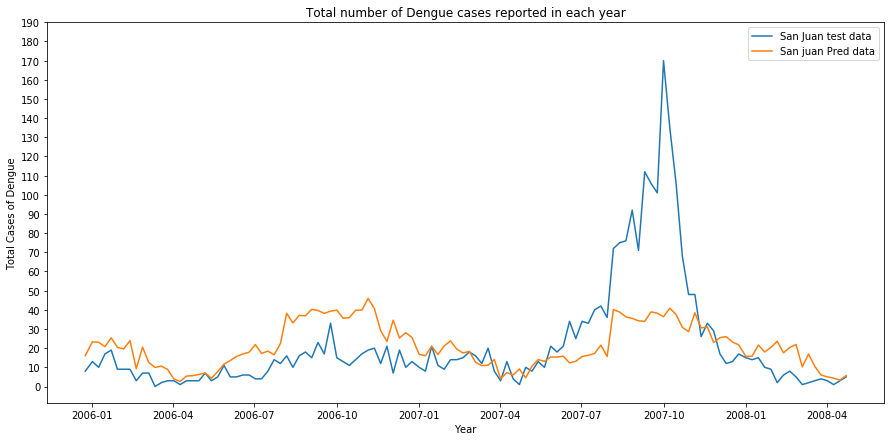

In [132]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( Y_sj_test, label='San Juan test data' )
plt.plot( Y_sj_test.index, Y_sj_pred, label='San juan Pred data')
plt.yticks(np.arange(0,200, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

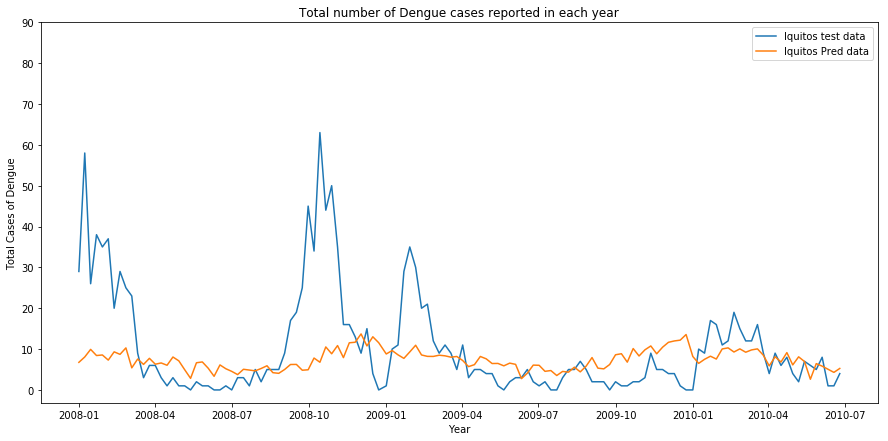

In [133]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( Y_iq_test, label='Iquitos test data' )
plt.plot( Y_iq_test.index, Y_iq_pred, label='Iquitos Pred data')
plt.yticks(np.arange(0,100, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

###### New features exploration

As per the score and graphs, the model is not meeting to the expectation. Looks like we need to generate new features.

In the disease information, we got an idea about the mosquito life cycle and weather factors affecting dengue fever.

So we need to consider the weather factors of earlier weeks to identify the actual reason behind the disease spread.

###### Auto correlation and Partial auto correlation

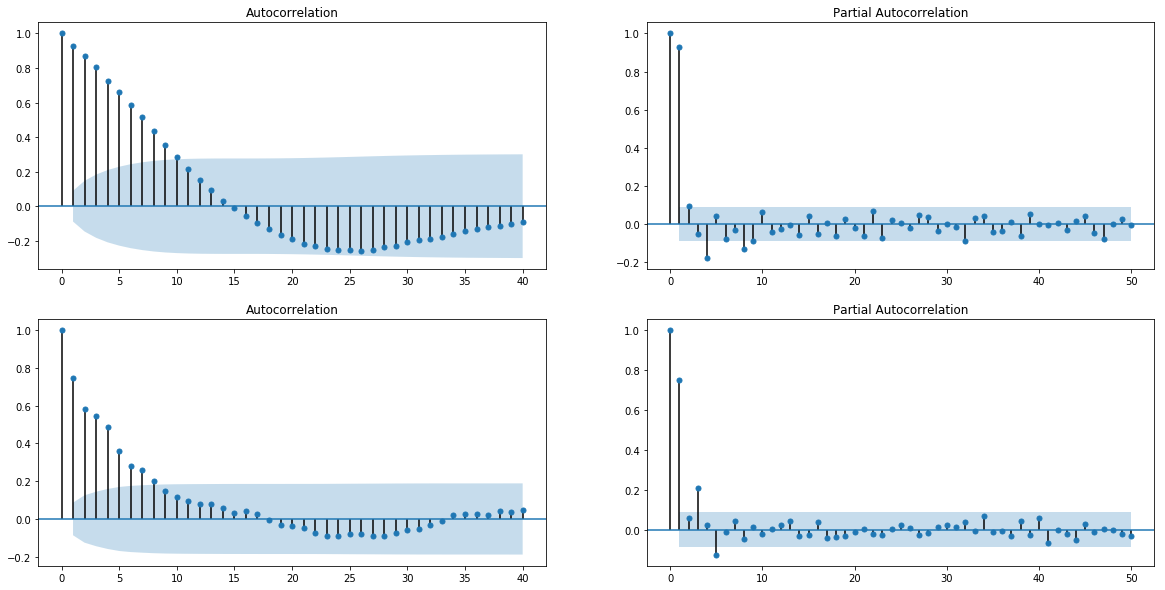

In [262]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(221)
plot_acf(dengue_train_sj_after_1998.total_cases, lags = 40, ax = ax1)

ax2 = fig.add_subplot(222)
plot_pacf(dengue_train_sj_after_1998.total_cases, lags = 50, ax = ax2)

ax3 = fig.add_subplot(223)
plot_acf(dengue_train_iq.total_cases,  lags = 40, ax = ax3)

ax4 = fig.add_subplot(224)
plot_pacf(dengue_train_iq.total_cases, lags = 50, ax = ax4)
plt.show()



In [134]:
#  New features from Satellite vegetation - Normalized difference vegetation index (NDVI)
# ndvi_se – Pixel southeast of city centroid
# ndvi_sw – Pixel southwest of city centroid
# ndvi_ne – Pixel northeast of city centroid
# ndvi_nw – Pixel northwest of city centroid

seven_weeks = 7
six_weeks = 6
five_weeks = 5
four_weeks = 4
three_weeeks = 3
two_weeks = 2

sj_lag = four_weeks
iq_lag = five_weeks

As per the trials, we got know that, the four weeks roolling features for San Juan is getting good results. For Iquitos, five weeks rolling features are good.

In [135]:
ndvi_cols=[ 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']
for col in ndvi_cols:
    dengue_train_sj_after_1998[col + '_lagSum']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).sum()
    dengue_train_sj_after_1998[col + '_lagMean'] = dengue_train_sj_after_1998[col].rolling( sj_lag ).mean()
    dengue_train_sj_after_1998[col + '_lagVar']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).var()
#    dengue_train_sj_after_1998[col + '_lagMax']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).max()
#    dengue_train_sj_after_1998[col + '_lagMin']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).min()
#    dengue_train_sj_after_1998[col + '_lagstd']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).std()
    dengue_train_iq[col + '_lagSum']  = dengue_train_iq[col].rolling( iq_lag ).sum()
    dengue_train_iq[col + '_lagMean'] = dengue_train_iq[col].rolling( iq_lag ).mean()
    dengue_train_iq[col + '_lagVar']  = dengue_train_iq[col].rolling( iq_lag ).var()
#    dengue_train_iq[col + '_lagMax']  = dengue_train_iq[col].rolling( iq_lag ).max()
#    dengue_train_iq[col + '_lagMin']  = dengue_train_iq[col].rolling( iq_lag ).min()
#    dengue_train_iq[col + '_lagStd']  = dengue_train_iq[col].rolling( iq_lag ).std()

In [136]:
# Humidity columns
# reanalysis_relative_humidity_percent – Mean relative humidity
# reanalysis_specific_humidity_g_per_kg – Mean specific humidity
humidity_cols = [ 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg']
for col in humidity_cols:
    dengue_train_sj_after_1998[col + '_lagSum']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).sum()
    dengue_train_sj_after_1998[col + '_lagMean'] = dengue_train_sj_after_1998[col].rolling( sj_lag ).mean()
    dengue_train_sj_after_1998[col + '_lagVar']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).var()
#    dengue_train_sj_after_1998[col + '_lagMax']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).max()
#    dengue_train_sj_after_1998[col + '_lagMin']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).min()
#    dengue_train_sj_after_1998[col + '_lagstd']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).std()
    dengue_train_iq[col + '_lagSum']  = dengue_train_iq[col].rolling( iq_lag ).sum()
    dengue_train_iq[col + '_lagMean'] = dengue_train_iq[col].rolling( iq_lag ).mean()
    dengue_train_iq[col + '_lagVar']  = dengue_train_iq[col].rolling( iq_lag ).var()
#    dengue_train_iq[col + '_lagMax']  = dengue_train_iq[col].rolling( iq_lag ).max()
#    dengue_train_iq[col + '_lagMin']  = dengue_train_iq[col].rolling( iq_lag ).min()
#    dengue_train_iq[col + '_lagStd']  = dengue_train_iq[col].rolling( iq_lag ).std()

In [137]:
# air temperature analysis
air_temp_cols = ['reanalysis_air_temp_c', 'reanalysis_max_air_temp_c', 'reanalysis_min_air_temp_c', 
                 'reanalysis_tdtr_c']
for col in air_temp_cols:
    dengue_train_sj_after_1998[col + '_lagSum']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).sum()
    dengue_train_sj_after_1998[col + '_lagMean'] = dengue_train_sj_after_1998[col].rolling( sj_lag ).mean()
    dengue_train_sj_after_1998[col + '_lagVar']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).var()
#    dengue_train_sj_after_1998[col + '_lagMax']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).max()
#    dengue_train_sj_after_1998[col + '_lagMin']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).min()
#    dengue_train_sj_after_1998[col + '_lagstd']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).std()
    dengue_train_iq[col + '_lagSum']  = dengue_train_iq[col].rolling( iq_lag ).sum()
    dengue_train_iq[col + '_lagMean'] = dengue_train_iq[col].rolling( iq_lag ).mean()
    dengue_train_iq[col + '_lagVar']  = dengue_train_iq[col].rolling( iq_lag ).var()
#    dengue_train_iq[col + '_lagMax']  = dengue_train_iq[col].rolling( iq_lag ).max()
#    dengue_train_iq[col + '_lagMin']  = dengue_train_iq[col].rolling( iq_lag ).min()
#    dengue_train_iq[col + '_lagStd']  = dengue_train_iq[col].rolling( iq_lag ).std()

In [138]:
# precipitation anslysis
precip_cols = [ 'reanalysis_precip_amt_kg_per_m2','station_precip_mm']
for col in precip_cols:
    dengue_train_sj_after_1998[col + '_lagSum']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).sum()
    dengue_train_sj_after_1998[col + '_lagMean'] = dengue_train_sj_after_1998[col].rolling( sj_lag ).mean()
    dengue_train_sj_after_1998[col + '_lagVar']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).var()
#    dengue_train_sj_after_1998[col + '_lagMax']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).max()
#    dengue_train_sj_after_1998[col + '_lagMin']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).min()
#    dengue_train_sj_after_1998[col + '_lagstd']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).std()
    dengue_train_iq[col + '_lagSum']  = dengue_train_iq[col].rolling( iq_lag ).sum()
    dengue_train_iq[col + '_lagMean'] = dengue_train_iq[col].rolling( iq_lag ).mean()
    dengue_train_iq[col + '_lagVar']  = dengue_train_iq[col].rolling( iq_lag ).var()
#    dengue_train_iq[col + '_lagMax']  = dengue_train_iq[col].rolling( iq_lag ).max()
#    dengue_train_iq[col + '_lagMin']  = dengue_train_iq[col].rolling( iq_lag ).min()
#    dengue_train_iq[col + '_lagStd']  = dengue_train_iq[col].rolling( iq_lag ).std()

In [139]:
#  station temperature features
station_cols = ['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c'] 
for col in station_cols:
    dengue_train_sj_after_1998[col + '_lagSum']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).sum()
    dengue_train_sj_after_1998[col + '_lagMean'] = dengue_train_sj_after_1998[col].rolling( sj_lag ).mean()
    dengue_train_sj_after_1998[col + '_lagVar']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).var()
#    dengue_train_sj_after_1998[col + '_lagMax']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).max()
#    dengue_train_sj_after_1998[col + '_lagMin']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).min()
#    dengue_train_sj_after_1998[col + '_lagstd']  = dengue_train_sj_after_1998[col].rolling( sj_lag ).std()
    dengue_train_iq[col + '_lagSum']  = dengue_train_iq[col].rolling( iq_lag ).sum()
    dengue_train_iq[col + '_lagMean'] = dengue_train_iq[col].rolling( iq_lag ).mean()
    dengue_train_iq[col + '_lagVar']  = dengue_train_iq[col].rolling( iq_lag ).var()
#    dengue_train_iq[col + '_lagMax']  = dengue_train_iq[col].rolling( iq_lag ).max()
#    dengue_train_iq[col + '_lagMin']  = dengue_train_iq[col].rolling( iq_lag ).min()
#    dengue_train_iq[col + '_lagStd']  = dengue_train_iq[col].rolling( iq_lag ).std()

In [140]:
dengue_train_sj_after_1998.head(10)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_max_air_temp_c,...,station_avg_temp_c_lagVar,station_diur_temp_rng_c_lagSum,station_diur_temp_rng_c_lagMean,station_diur_temp_rng_c_lagVar,station_max_temp_c_lagSum,station_max_temp_c_lagMean,station_max_temp_c_lagVar,station_min_temp_c_lagSum,station_min_temp_c_lagMean,station_min_temp_c_lagVar
week_start_date,,,,,,,,,,,,,,,,,,,,,
1998-12-17,sj,1998,51,-0.082167,-0.091675,0.239900,0.170057,16.760,25.892857,27.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-24,sj,1998,52,0.060567,-0.130950,0.157150,0.098187,0.000,26.132857,28.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-01,sj,1999,53,-0.006256,-0.109275,0.172925,0.130802,22.695,25.841429,27.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-08,sj,1999,1,-0.073078,-0.087600,0.188700,0.163417,45.390,25.550000,27.55,...,0.047088,22.814286,5.703571,0.065901,119.45,29.8625,0.882292,89.4,22.350,0.090000
1999-01-15,sj,1999,2,-0.139900,-0.037633,0.181383,0.144843,0.000,25.332857,26.95,...,0.136373,23.000000,5.750000,0.054626,116.65,29.1625,0.532292,86.6,21.650,1.210000
1999-01-22,sj,1999,3,-0.069800,-0.037950,0.180800,0.115843,47.160,24.711429,26.85,...,0.139741,23.842857,5.960714,0.396786,116.65,29.1625,0.532292,85.5,21.375,1.109167
1999-01-29,sj,1999,4,0.053500,-0.108750,0.181843,0.140614,0.000,24.292857,25.95,...,0.092925,24.500000,6.125000,0.415561,115.50,28.8750,0.642500,84.4,21.100,0.806667
1999-02-05,sj,1999,5,0.060200,0.051450,0.217500,0.173929,0.000,23.622857,26.15,...,0.169592,24.671429,6.167857,0.348214,114.40,28.6000,0.926667,81.6,20.400,0.713333
1999-02-12,sj,1999,6,0.066900,0.043925,0.228329,0.209200,0.000,23.518571,25.75,...,0.541684,26.328571,6.582143,0.549439,113.90,28.4750,1.089167,79.4,19.850,2.510000


In [141]:
dengue_train_iq.head(10)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_max_air_temp_c,...,station_avg_temp_c_lagVar,station_diur_temp_rng_c_lagSum,station_diur_temp_rng_c_lagMean,station_diur_temp_rng_c_lagVar,station_max_temp_c_lagSum,station_max_temp_c_lagMean,station_max_temp_c_lagVar,station_min_temp_c_lagSum,station_min_temp_c_lagMean,station_min_temp_c_lagVar
week_start_date,,,,,,,,,,,,,,,,,,,,,
2000-07-01,iq,2000,26,0.192886,0.132257,0.340886,0.247200,25.41,23.590000,34.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-08,iq,2000,27,0.216833,0.276100,0.289457,0.241657,60.61,23.484286,33.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-15,iq,2000,28,0.176757,0.173129,0.204114,0.128014,55.52,23.265714,31.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-22,iq,2000,29,0.227729,0.145429,0.254200,0.200314,5.60,22.207143,30.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-29,iq,2000,30,0.328643,0.322129,0.254371,0.361043,62.76,23.282857,33.85,...,0.201889,55.821667,11.164333,0.225666,164.3,32.86,0.873,96.0,19.20,6.830
2000-08-05,iq,2000,31,0.205529,0.190757,0.231671,0.255314,16.24,24.041429,33.05,...,0.476076,55.986667,11.197333,0.198991,163.8,32.76,1.013,92.3,18.46,6.793
2000-08-12,iq,2000,32,0.312486,0.329986,0.380586,0.387271,89.37,24.170000,35.65,...,0.514887,56.070000,11.214000,0.215769,163.8,32.76,1.013,91.4,18.28,5.902
2000-08-19,iq,2000,33,0.384133,0.392240,0.341780,0.382750,42.08,24.477143,34.75,...,0.470614,54.920000,10.984000,0.334986,163.8,32.76,1.013,91.2,18.24,5.668
2000-08-26,iq,2000,34,0.408157,0.322157,0.406714,0.302714,49.22,25.088571,36.95,...,0.447192,57.786667,11.557333,1.332586,166.3,33.26,0.688,95.5,19.10,1.755


In [142]:
split_date_iq = '22-Jul-2000'
split_date_sj = '01-Jan-1999'
dengue_train_sj_bf_1999, dengue_train_sj_after_1998 = split_data( dengue_train_sj_after_1998, split_date_sj )
dengue_train_sj_bf_1999, dengue_train_iq = split_data( dengue_train_iq, split_date_iq )

In [143]:
from sklearn.feature_selection import RFECV
X = pd.DataFrame( dengue_train_sj_after_1998 )
y = dengue_train_sj_after_1998.total_cases
X.drop( columns = ['city','year','total_cases'], inplace = True )

# create a base classifier used to evaluate a subset of attributes
linear_sj_model = LinearRegression()

# create the RFE model and select n attributes
selector = RFECV( linear_sj_model, min_features_to_select=10, step=1, cv=25)
rfe = selector.fit(X, y)
X_Select = X.loc[:, selector.support_]
print( "San Juan Selected Features : ", X.columns[selector.support_] )

# Split based on the newly selected features and train and test again
X_sj_train, X_sj_test, Y_sj_train, Y_sj_test = train_test_split( X_Select, y, shuffle = False)
linear_sj_model.fit(X_sj_train, Y_sj_train)
Y_sj_pred = linear_sj_model.predict(X_sj_test)

score = linear_sj_model.score(X_sj_test, Y_sj_test)

linReg_sj_MAE = mean_absolute_error(Y_sj_test, Y_sj_pred)
print( "Linear Regression San Juan MAE   :" , linReg_sj_MAE )
print( "Linear Regression San Juan Score :" , score )

X = pd.DataFrame( dengue_train_iq )
y = dengue_train_iq.total_cases
X.drop( columns = ['city','year','total_cases'], inplace = True )
# create a base classifier used to evaluate a subset of attributes
linear_iq_model = LinearRegression()
print("")
# create the RFE model and select n attributes
selector = RFECV( linear_iq_model, min_features_to_select=7, step=1, cv=20)
rfe = selector.fit(X, y)
X_Select = X.loc[:, selector.support_]

print( "Iquitos Selected Features : ", X.columns[selector.support_] )

# Split based on the newly selected features and train and test again
X_iq_train, X_iq_test, Y_iq_train, Y_iq_test = train_test_split( X_Select, y, shuffle = False)
linear_iq_model.fit(X_iq_train, Y_iq_train)
Y_iq_pred = linear_iq_model.predict(X_iq_test)

linReg_iq_MAE = mean_absolute_error(Y_iq_test, Y_iq_pred)
print( "Linear Regression Iquitos MAE   :" , linReg_iq_MAE )

score = linear_iq_model.score(X_iq_test, Y_iq_test)
print( "Linear Regression Iquitos Score :" , score )

pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "MAE : ", mean_absolute_error( y_test, pred ))

San Juan Selected Features :  Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'month_3', 'month_6',
       'month_7', 'quarter_1', 'ndvi_ne_lagSum', 'ndvi_ne_lagMean',
       'ndvi_ne_lagVar', 'ndvi_nw_lagSum', 'ndvi_nw_lagMean', 'ndvi_nw_lagVar',
       'ndvi_se_lagVar', 'ndvi_sw_lagSum', 'ndvi_sw_lagMean', 'ndvi_sw_lagVar',
       'reanalysis_air_temp_c_lagSum', 'reanalysis_air_temp_c_lagVar',
       'station_avg_temp_c_lagVar', 'station_min_temp_c_lagVar'],
      dtype='object')
Linear Regression San Juan MAE   : 13.688606811805641
Linear Regression San Juan Score : 0.38192643421775696

Iquitos Selected Features :  Index(['month_10', 'month_11', 'month_12', 'quarter_1', 'quarter_2',
       'quarter_3', 'quarter_4', 'ndvi_ne_lagSum', 'ndvi_ne_lagMean',
       'ndvi_ne_lagVar', 'ndvi_nw_lagSum', 'ndvi_nw_lagMean', 'ndvi_nw_lagVar',
       'ndvi_se_lagSum', 'ndvi_se_lagMean', 'ndvi_se_lagVar', 'ndvi_sw_lagSum',
       'ndvi_sw_lagMean', 'ndvi_sw_lagVar',
       'reanalysis_relative_

###### Lasso

In [144]:
# Tested with a range of alpha 0.1 to 2.0. For San Juan, 0.1 gave good result. For  Iquitos, apha 1 is good.
clf = LassoCV( alphas = [0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,9,9.5,9.9,10,10.5,10.4,10.6,20,75,30,40,45,50] )
clf.fit( X_sj_train, Y_sj_train )
Y_sj_pred = clf.predict( X_sj_test )
score = clf.score( X_sj_test, Y_sj_test)
linReg_sj_MAE = mean_absolute_error(Y_sj_test, Y_sj_pred)
print( "Linear Model Lasso San Juan MAE :" , linReg_sj_MAE )
print( "Linear Model Lasso alpha        :" , clf.alpha_ )
print( "Linear Regression San juan Score:" , score )

clf = LassoCV( alphas = [0.1,0.2,0.5,0.6,0.8,0.9,1,1.5,2,2.9,3,5.1,5.6,5.75,5.5,5.4,4.8,4,5,6,7,8,9,10,11,20,30,32,32.2,32.21,32.22,33,35,40] )
clf.fit( X_iq_train, Y_iq_train )
Y_iq_pred = clf.predict( X_iq_test )
score = clf.score( X_iq_test, Y_iq_test)
linReg_iq_MAE = mean_absolute_error(Y_iq_test, Y_iq_pred)
print( "Linear Model Lasso Iquitos MAE  :" , linReg_iq_MAE )
print( "Linear Model Lasso alpha        :" , clf.alpha_ )
print( "Linear Regression Iquitos Score :" , score )

pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "MAE : ", mean_absolute_error( y_test, pred ))


Linear Model Lasso San Juan MAE : 14.128570771477522
Linear Model Lasso alpha        : 0.1
Linear Regression San juan Score: 0.35795989483496415
Linear Model Lasso Iquitos MAE  : 8.013662822621844
Linear Model Lasso alpha        : 4.0
Linear Regression Iquitos Score : -0.0364020014784292
MAE :  10.973278269867992


###### Ridge

In [145]:
# Tested with a range of alpha values. For San Juan, 0.3 gave good result. For  Iquitos, apha 11 is good.
clf = RidgeCV( alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.15,1.15,1.2,1.225,1.22,1.23,1.24,1.25,1.3,1.4,1.5,2,3,4,5,9,10,20,25,30,40,45,50] )
clf.fit( X_sj_train, Y_sj_train )
Y_sj_pred = clf.predict( X_sj_test )
linReg_sj_MAE = mean_absolute_error(Y_sj_test, Y_sj_pred)
score = clf.score( X_sj_test, Y_sj_test)
print( "Linear Model Ridge San Juan MAE :" , linReg_sj_MAE )
print( "Linear Model Ridge alpha        :" , clf.alpha_ )
print( "Linear Regression San juan Score:" , score )

clf = RidgeCV( alphas = [0.1,0.2,0.7,1,1.675,1.68,1.685,1.7,1.71,1.72,1.75,1.78,1.83,1.8,1.82,1.81,1.9,2,2.05,2.01,2.2,2.4,2.5,3,4,5,8,9,10,15,16,16.3,20,25,30,40,45] )
clf.fit( X_iq_train, Y_iq_train )
Y_iq_pred = clf.predict( X_iq_test )
linReg_iq_MAE = mean_absolute_error(Y_iq_test, Y_iq_pred)
score = clf.score( X_iq_test, Y_iq_test)
print( "Linear Model Ridge Iquitos MAE  :" , linReg_iq_MAE )
print( "Linear Model Ridge alpha        :" , clf.alpha_ )
print( "Linear Regression Iquitos Score :" , score )

pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "MAE : ", mean_absolute_error( y_test, pred ))

Linear Model Ridge San Juan MAE : 13.929175832634332
Linear Model Ridge alpha        : 1.5
Linear Regression San juan Score: 0.3693076520355558
Linear Model Ridge Iquitos MAE  : 7.509152821893582
Linear Model Ridge alpha        : 1.68
Linear Regression Iquitos Score : 0.031272764608987424
MAE :  10.616443959092107


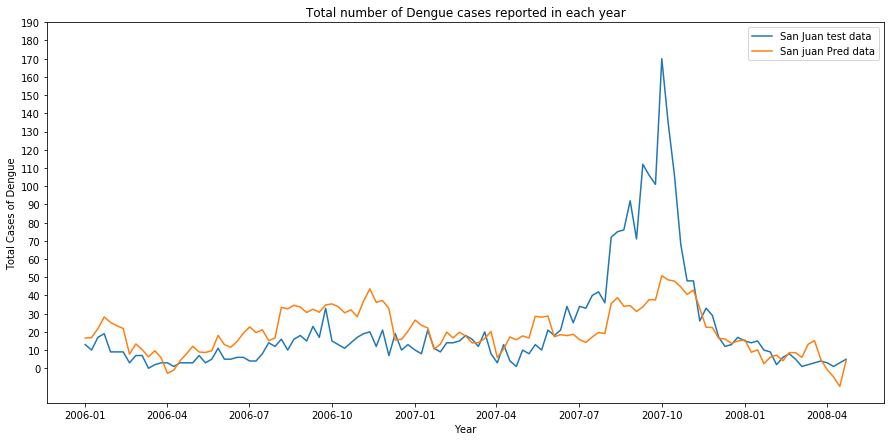

In [146]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( Y_sj_test, label='San Juan test data' )
plt.plot( Y_sj_test.index, Y_sj_pred, label='San juan Pred data')
plt.yticks(np.arange(0,200, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

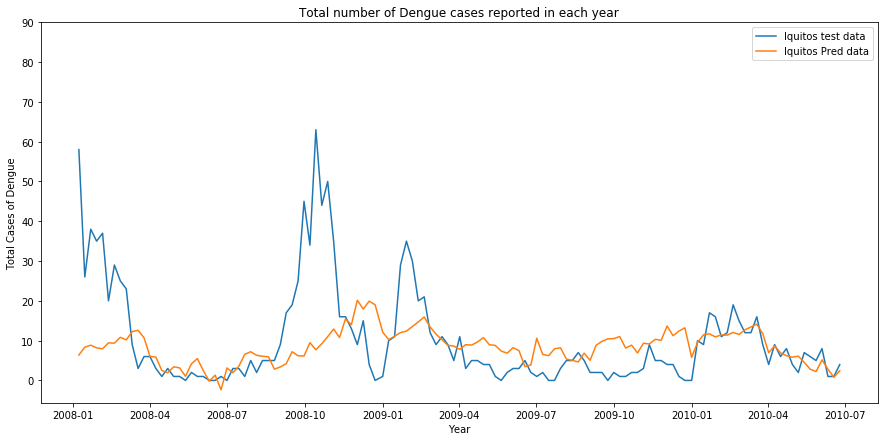

In [147]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( Y_iq_test, label='Iquitos test data' )
plt.plot( Y_iq_test.index, Y_iq_pred, label='Iquitos Pred data')
plt.yticks(np.arange(0,100, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()


###### GLM Methods available for count as dependent variable  are
1. Negative binomial regression
2. Poisson Regression
3. OLS regression with Log transformation

##### Negative binomial regression

Negative binomial regression is a type of generalized linear model in which the dependent variable is a count of the number of times an event occurs. Negative binomial regression is implemented using maximum likelihood estimation.
If the data has high variance compared to mean, over dispersed data, we need to use this regression.


Based on data dispersed behavior( varaiance is much higher compared to mean ), we can skip Poisson regression

if lot of zeros in data, zero inflated regression
When modelling count data, linear regression (Ordinary Least Squares) is not appropriate. It requires the response variable to be a continuous quantity without restrictions on its range, whereas count data must have non-negative integer values.




In [148]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
#from statsmodels.tools import eval_measures

#from sklearn.feature_selection import f_regression
#from sklearn.feature_selection import SelectKBest

In [149]:
#X = pd.DataFrame( dengue_train_sj_after_1998 )
#y = dengue_train_sj_after_1998.total_cases
#X.drop( columns = ['city','year','total_cases'], inplace = True )

In [150]:
#selector = SelectKBest(f_regression, k=feature_selection).fit(X,y)
#X_sel = X.loc[:,selector.get_support()]
##X.columns[selector.get_support()]
#
#X_sj_train, X_sj_test, Y_sj_train, Y_sj_test = train_test_split(X_sel, y, shuffle = False)

In [151]:
# Formula
formula = ' + '.join([ str(feature) for feature in list(X_sj_train.columns)])
formula = 'y ~ ' + formula

# Data formatting for San Juan city
sj_train      = X_sj_train.copy()
sj_train['y'] = Y_sj_train
sj_test       = X_sj_test.copy()

nb_model = smf.glm( formula = formula,
                    data = sj_train,
                    family = sm.families.NegativeBinomial(alpha=0.001)).fit()
nb_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  363
Model:                            GLM   Df Residuals:                      343
Model Family:        NegativeBinomial   Df Model:                           19
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2304.6
Date:                Mon, 17 Jun 2019   Deviance:                       3018.3
Time:                        09:48:30   Pearson chi2:                 3.17e+03
No. Iterations:                     5   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -14.2488      0.491    -28.992      0.000     -15.212     -13.286
ndvi_ne                         -0.2179      0.187     -1.167      0.243      -0.584       0.148
ndvi_nw                          0.4093      0.222      1.847      0.065      -0.025       0.844
ndvi_se                          1.9250      0.371      5.188      0.000       1.198       2.652
ndvi_sw                         -1.8494      0.407     -4.546      0.000      -2.647      -1.052
month_3                         -0.4120      0.071     -5.787      0.000      -0.552      -0.272
month_6                         -0.7610      0.065    -11.782      0.000      -0.888      -0.634
month_7                         -0.5393      0.047    -11.469      0.000      -0.631      -0.447
quarter_1                        1.0370      0.050     20.734      0.000       0.939       1.135
ndvi_ne_lagSum                  -0.9503      0.078    -12.132      0.000      -1.104      -0.797
ndvi_ne_lagMean                 -0.2376      0.020    -12.132      0.000      -0.276      -0.199
ndvi_ne_lagVar                  -2.7272      1.416     -1.926      0.054      -5.503       0.049
ndvi_nw_lagSum                   0.9570      0.091     10.534      0.000       0.779       1.135
ndvi_nw_lagMean                  0.2393      0.023     10.534      0.000       0.195       0.284
ndvi_nw_lagVar                   3.9289      2.533      1.551      0.121      -1.035       8.893
ndvi_se_lagVar                  20.9385      5.110      4.098      0.000      10.924      30.953
ndvi_sw_lagSum                  -0.8656      0.099     -8.711      0.000      -1.060      -0.671
ndvi_sw_lagMean                 -0.2164      0.025     -8.711      0.000      -0.265      -0.168
ndvi_sw_lagVar                 -26.1211      5.460     -4.784      0.000     -36.823     -15.420
reanalysis_air_temp_c_lagSum     0.1636      0.004     36.819      0.000       0.155       0.172
reanalysis_air_temp_c_lagVar     0.8380      0.106      7.884      0.000       0.630       1.046
station_avg_temp_c_lagVar       -0.2291      0.060     -3.789      0.000      -0.348      -0.111
station_min_temp_c_lagVar        0.3242      0.017     19.165      0.000       0.291       0.357
================================================================================================
"""

In [152]:
Y_sj_pred = nb_model.predict(sj_test).astype(int)
print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_pred, Y_sj_test))

pred_train_sj = nb_model.predict(sj_train).astype(int)
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, Y_sj_train))

San Juan Test  MAE error : 12.776859504132231
San Juan Train MAE error : 10.179063360881543


In [153]:
#X = pd.DataFrame( dengue_train_iq )
#y = dengue_train_iq.total_cases
#X.drop( columns = ['city','year','total_cases'], inplace = True )

In [154]:
#X_iq_train, X_iq_test, Y_iq_train, Y_iq_test = train_test_split( X, y, test_size = 0.25, random_state=1))

In [155]:
#selector = SelectKBest(f_regression, k=feature_selection).fit(X,y.total_cases)
#X = X.loc[:,selector.get_support()]

In [156]:
# Formula
formula = ' + '.join([ str(feature) for feature in list(X_iq_train.columns)])
formula = 'y ~ ' + formula

# Data formatting for San Juan city
iq_train      = X_iq_train.copy()
iq_train['y'] = Y_iq_train
iq_test       = X_iq_test.copy()

nb_model = smf.glm( formula = formula,
                    data = iq_train,
                    family = sm.families.NegativeBinomial(alpha=0.003)).fit()
nb_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  387
Model:                            GLM   Df Residuals:                      365
Model Family:        NegativeBinomial   Df Model:                           21
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1684.3
Date:                Mon, 17 Jun 2019   Deviance:                       2263.9
Time:                        09:48:30   Pearson chi2:                 2.56e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                       -16.3090      9.604     -1.698      0.089     -35.132       2.514
month_10                                         -0.7133      0.647     -1.102      0.270      -1.981       0.555
month_11                                         -1.0022      0.641     -1.564      0.118      -2.259       0.254
month_12                                         -1.0263      0.638     -1.609      0.108      -2.277       0.224
quarter_1                                        -4.4411      2.568     -1.730      0.084      -9.474       0.591
quarter_2                                        -5.1899      2.577     -2.014      0.044     -10.240      -0.140
quarter_3                                        -3.9362      2.543     -1.548      0.122      -8.921       1.048
quarter_4                                        -2.7418      1.919     -1.429      0.153      -6.503       1.019
ndvi_ne_lagSum                                    0.8763      0.250      3.506      0.000       0.386       1.366
ndvi_ne_lagMean                                   0.1753      0.050      3.506      0.000       0.077       0.273
ndvi_ne_lagVar                                  -34.0532      9.856     -3.455      0.001     -53.372     -14.735
ndvi_nw_lagSum                                   -0.0504      0.238     -0.212      0.832      -0.517       0.416
ndvi_nw_lagMean                                  -0.0101      0.048     -0.212      0.832      -0.103       0.083
ndvi_nw_lagVar                                   39.7564      8.174      4.864      0.000      23.736      55.776
ndvi_se_lagSum                                   -1.9396      0.176    -10.996      0.000      -2.285      -1.594
ndvi_se_lagMean                                  -0.3879      0.035    -10.996      0.000      -0.457      -0.319
ndvi_se_lagVar                                  -31.3253      8.233     -3.805      0.000     -47.462     -15.188
ndvi_sw_lagSum                                   -0.2486      0.227     -1.094      0.274      -0.694       0.197
ndvi_sw_lagMean                                  -0.0497      0.045     -1.094      0.274      -0.139       0.039
ndvi_sw_lagVar                                   -6.8868      8.462     -0.814      0.416     -23.473       9.699
reanalysis_relative_humidity_percent_lagSum       0.0210      0.018      1.153      0.249      -0.015       0.057
reanalysis_relative_humidity_percent_lagMean      0.0042      0.004      1.153      0.249      -0.003       0.011
reanalysis_specific_humidity_g_per_kg_lagSum      0.0134      0.079      0.170      0.865      -0.141       0.168
reanalysis_specific_humidity_g_per_kg_lagMean     0.0027      0.016      0.170      0.865      -0.028       0.034
reanalysis_air_temp_c_lagSum                      0.2616      0.085      3.075      

In [157]:
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, Y_sj_train))

Iquitos Test   MAE error : 7.232558139534884
Iquitos Train  MAE error : 4.922480620155039


In [158]:
pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "Total Test  MAE : ", mean_absolute_error( y_test, pred ))

pred = list(pred_train_sj)  + list(pred_train_iq)
y_test = list( Y_sj_train ) + list ( Y_iq_train )
print( "Total Train MAE : ", mean_absolute_error( y_test, pred ))

Total Test  MAE :  9.916
Total Train MAE :  7.466666666666667


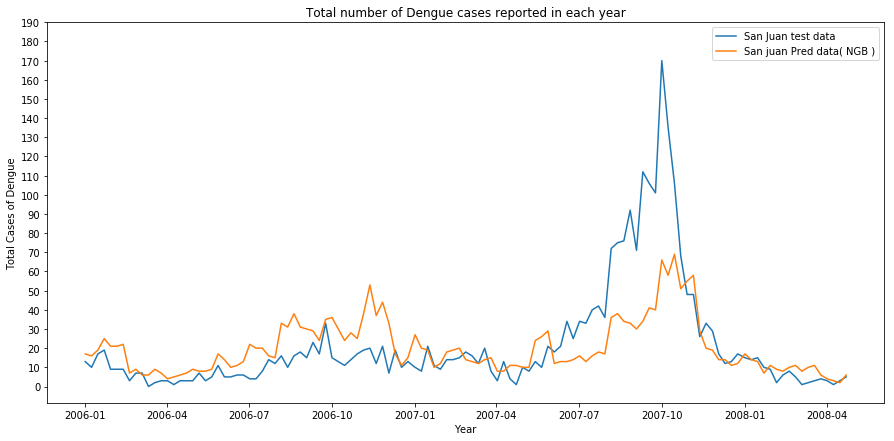

In [159]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( Y_sj_test, label='San Juan test data' )
plt.plot( Y_sj_test.index, Y_sj_pred, label='San juan Pred data( NGB )')
plt.yticks(np.arange(0,200, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

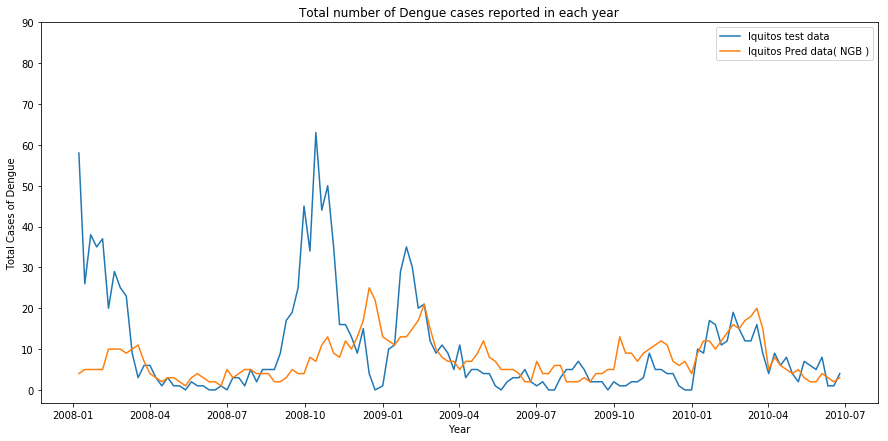

In [160]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( Y_iq_test, label='Iquitos test data' )
plt.plot( Y_iq_test.index, Y_iq_pred, label='Iquitos Pred data( NGB )')
plt.yticks(np.arange(0,100, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

###### Binomial Regression Results
- Total Test  MAE :  9.916
- Total Train MAE :  7.466666666666667
- San Juan Test  MAE error : 12.776859504132231
- San Juan Train MAE error : 10.179063360881543
- Iquitos Test   MAE error : 7.232558139534884
- Iquitos Train  MAE error : 4.922480620155039

###### OLS regression

In [168]:
# Note the difference in argument order
model = sm.OLS( Y_sj_train, X_sj_train ).fit() 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     28.21
Date:                Mon, 17 Jun 2019   Prob (F-statistic):           1.11e-58
Time:                        09:58:08   Log-Likelihood:                -1574.0
No. Observations:                 363   AIC:                             3186.
Df Residuals:                     344   BIC:                             3260.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
ndvi_ne                         -7.1802     14.638     -0.491      0.624     -35.971      21.611
ndvi_nw                         10.9351     18.230      0.600      0.549     -24.921      46.791
ndvi_se                          4.8141     30.253      0.159      0.874     -54.690      64.318
ndvi_sw                          8.2908     33.835      0.245      0.807     -58.258      74.840
month_3                         -6.2346      4.625     -1.348      0.179     -15.331       2.862
month_6                        -16.3093      4.092     -3.985      0.000     -24.359      -8.260
month_7                        -11.9944      3.627     -3.307      0.001     -19.128      -4.861
quarter_1                       -2.8022      2.923     -0.959      0.338      -8.552       2.948
ndvi_ne_lagSum                 -21.0125      5.951     -3.531      0.000     -32.718      -9.307
ndvi_ne_lagMean                 -5.2531      1.488     -3.531      0.000      -8.180      -2.327
ndvi_ne_lagVar                -170.9116     82.165     -2.080      0.038    -332.521      -9.302
ndvi_nw_lagSum                  17.6001      7.277      2.419      0.016       3.287      31.913
ndvi_nw_lagMean                  4.4000      1.819      2.419      0.016       0.822       7.978
ndvi_nw_lagVar                -173.7551    189.265     -0.918      0.359    -546.017     198.507
ndvi_se_lagVar                 788.3796    442.746      1.781      0.076     -82.451    1659.210
ndvi_sw_lagSum                 -28.3439      8.410     -3.370      0.001     -44.886     -11.802
ndvi_sw_lagMean                 -7.0860      2.103     -3.370      0.001     -11.221      -2.951
ndvi_sw_lagVar                -750.7577    471.492     -1.592      0.112   -1678.127     176.612
reanalysis_air_temp_c_lagSum     0.3710      0.048      7.691      0.000       0.276       0.466
reanalysis_air_temp_c_lagVar   -14.3570      7.833     -1.833      0.068     -29.763       1.049
station_avg_temp_c_lagVar        0.4406      4.446      0.099      0.921      -8.305       9.186
station_min_temp_c_lagVar        9.9341      1.698      5.851      0.000       6.594      13.274
==============================================================================
Omnibus:                      125.141   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.343
Skew:                           1.597   Prob(JB):                     5.16e-82
Kurtosis:                       6.815   Cond. No.                     4.22e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.24e-33. This might indicate that there are
stron

In [171]:
Y_sj_pred = model.predict(X_sj_test).astype(int)
print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_pred, Y_sj_test))

pred_train_sj = model.predict(X_sj_train).astype(int)
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, Y_sj_train))

San Juan Test  MAE error : 16.867768595041323
San Juan Train MAE error : 13.0


We also tried with log transformation, but there is not improvement in the rresult.

Now we can analyze the data in time series mode. But before that we need to confirm, the time series is stationary or not.
###### Check whether the data is Time series stationary or not?
 - As per data plot ( based on year ), there is no trend or seasonality.
 - As per data plot ( based on month ), there we can see a trend of change.
 - Now we can do the summary statstics of the data.
     - we can split your time series into two partitions and compare the mean and variance of each group

In [174]:
dengue_train_sj_after_1998.total_cases.describe()

count    484.000000
mean      20.599174
std       23.623436
min        0.000000
25%        6.000000
50%       13.000000
75%       25.000000
max      170.000000
Name: total_cases, dtype: float64

In [186]:
dengue_train_sj_bf_2004, dengue_train_sj_after_2004 = split_data( dengue_train_sj_after_1998, '01-Jan-2004' )
print(dengue_train_sj_bf_2004.total_cases.describe())
print(dengue_train_sj_after_2004.total_cases.describe())

count    260.000000
mean      19.019231
std       17.417085
min        0.000000
25%        6.000000
50%       13.000000
75%       27.250000
max       77.000000
Name: total_cases, dtype: float64
count    224.000000
mean      22.433036
std       29.156682
min        0.000000
25%        7.000000
50%       13.000000
75%       21.000000
max      170.000000
Name: total_cases, dtype: float64


In [188]:
dengue_train_iq_bf_2004, dengue_train_iq_after_2004 = split_data( dengue_train_iq, '01-Jan-2005' )
print(dengue_train_iq_bf_2004.total_cases.describe())
print(dengue_train_iq_after_2004.total_cases.describe())

count    231.000000
mean       6.419913
std       11.711063
min        0.000000
25%        0.000000
50%        3.000000
75%        8.000000
max      116.000000
Name: total_cases, dtype: float64
count    285.000000
mean       8.600000
std        9.888178
min        0.000000
25%        3.000000
50%        5.000000
75%       10.000000
max       63.000000
Name: total_cases, dtype: float64


As per the mean and std, the is not stationary.

###### Augmented Dickey-Fuller test
a statistical test designed to explicitly comment on whether a univariate time series is stationary or not. The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.
- Null Hypothesis (H0) : it is non-stationary.
- Alternate Hypothesis (H1): it is stationary
 - We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

In [216]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
tot_cases = dengue_train_sj_after_1998.total_cases
result = adfuller(tot_cases)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.536358
p-value: 0.000002
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


As part of the output, We can see that our statistic value of -5 is less than the value of -3.449 at 1%.

This suggests that we can reject the null hypothesis with a significance level of less than 1%.

Rejecting the null hypothesis means that the time series is stationary or does not have time-dependent structure.

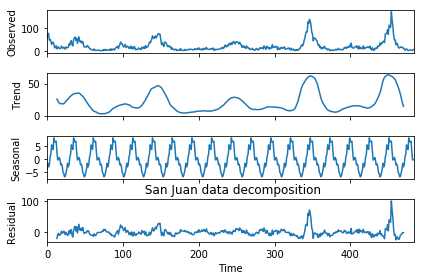

In [232]:
# Automatic Time Series Decomposition
sm.tsa.seasonal_decompose(dengue_train_sj_after_1998.total_cases.values, freq=26 ).plot()
plt.title( " San Juan data decomposition")
plt.show()

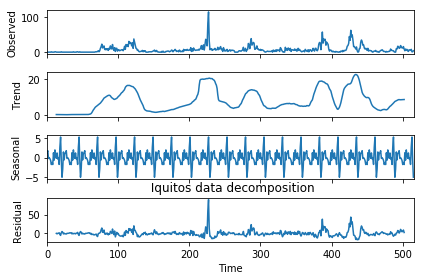

In [233]:
sm.tsa.seasonal_decompose(dengue_train_iq.total_cases.values, freq=26 ).plot()
plt.title( " Iquitos data decomposition")
plt.show()

###### Autoregressive Integrated Moving Average ARIMA(p,d,q) Model

The parameters of the ARIMA model are defined as follows:

    p: The number of lag observations included in the model, also called the lag order.
    d: The number of times that the raw observations are differenced, also called the degree of differencing.
    q: The size of the moving average window, also called the order of moving average.

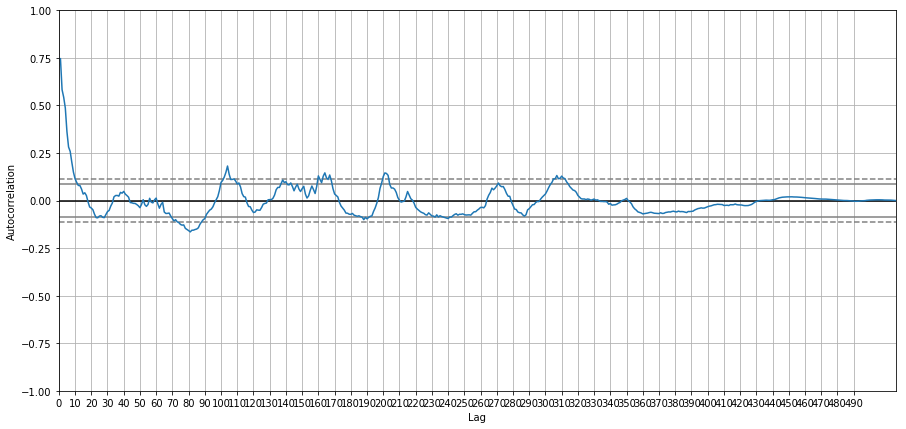

In [304]:
from pandas.plotting import autocorrelation_plot
plt.figure( figsize=( 15, 7 ))
autocorrelation_plot( dengue_train_iq['total_cases'] )
plt.xticks(np.arange(0, 500, 10))
plt.show()

In [349]:
def timeSeriesARIMA( city, X_train, y_train, X_test, y_test, p, d, q ):
    #train_tot_cases = y_train.astype(float)
    ARIMA_model = sm.tsa.ARIMA( y_train, order = ( p, d, q ), exog = X_train).fit()
    title = city + "residual data using ARIMA model"
    residuals = pd.DataFrame(ARIMA_model.resid)
    residuals.plot( title= title, figsize=( 15, 10 ))
    Y_pred_test = ARIMA_model.predict( p, len(y_test), exog = X_test).astype(int)
    print ( city, "Test  MAE error :", mean_absolute_error(Y_pred_test, y_test[p-1:]))
    y_pred_train = ARIMA_model.predict( p, len(y_train), exog = X_train).astype(int)
    print (city, "Train MAE error :", mean_absolute_error(y_pred_train, y_train[p-1:]))
    plt.show()

C:\Users\Resmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.total_cases   No. Observations:                  362
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1239.002
Method:                       css-mle   S.D. of innovations              7.412
Date:                Tue, 18 Jun 2019   AIC                           2534.004
Time:                        13:07:46   BIC                           2642.970
Sample:                             1   HQIC                          2577.322
                                                                              
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -14.3532     12.476     -1.150      0.251     -38.806      10.100
ndvi_ne                         -5.8888      5.413     -1.088      0.277     

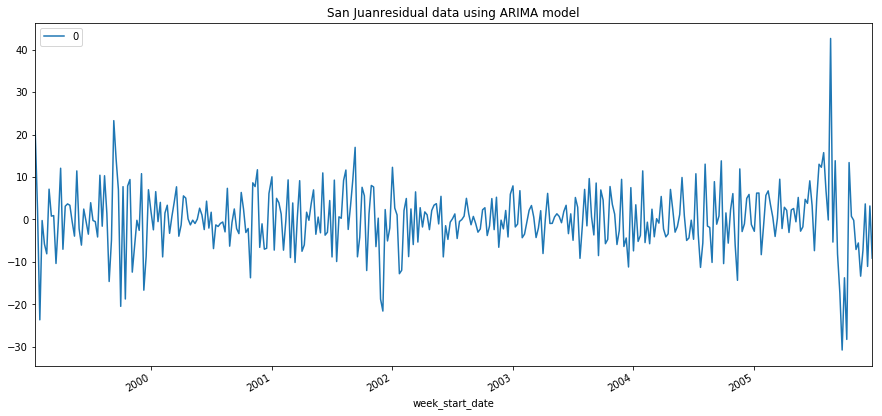

In [352]:
timeSeriesARIMA( 'San Juan', X_sj_train, Y_sj_train, X_sj_test, Y_sj_test, 2, 1, 2 )

C:\Users\Resmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.total_cases   No. Observations:                  701
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3780.637
Method:                       css-mle   S.D. of innovations             53.175
Date:                Tue, 18 Jun 2019   AIC                           7639.275
Time:                        13:28:17   BIC                           7816.822
Sample:                             1   HQIC                          7707.903
                                                                              
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  -166.5640        nan        nan        nan         nan         nan
weekofyear                                0.7742  

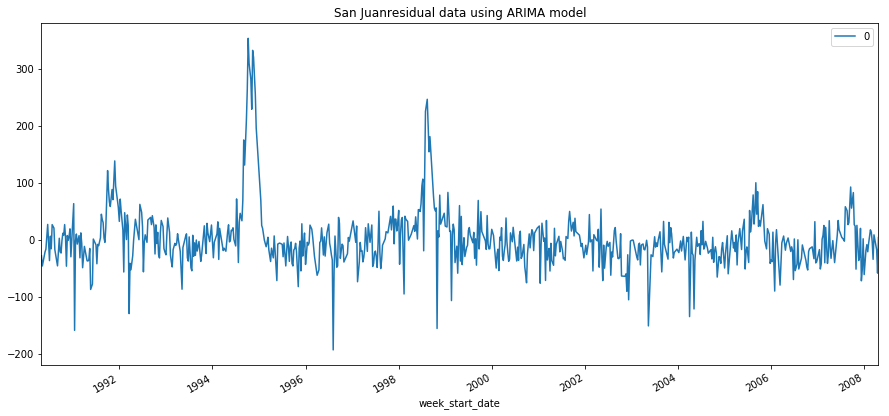

In [358]:
X = pd.DataFrame( dengue_train_sj )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_sj.total_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
timeSeriesARIMA( 'San Juan', X_train, y_train, X_test,  y_test, 2, 1, 1 )

C:\Users\Resmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.total_cases   No. Observations:                  386
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1299.124
Method:                       css-mle   S.D. of innovations              7.001
Date:                Tue, 18 Jun 2019   AIC                           2682.248
Time:                        13:08:00   BIC                           2848.393
Sample:                             1   HQIC                          2748.135
                                                                              
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           -95.6939        nan        nan        nan         nan         nan
month_10                  

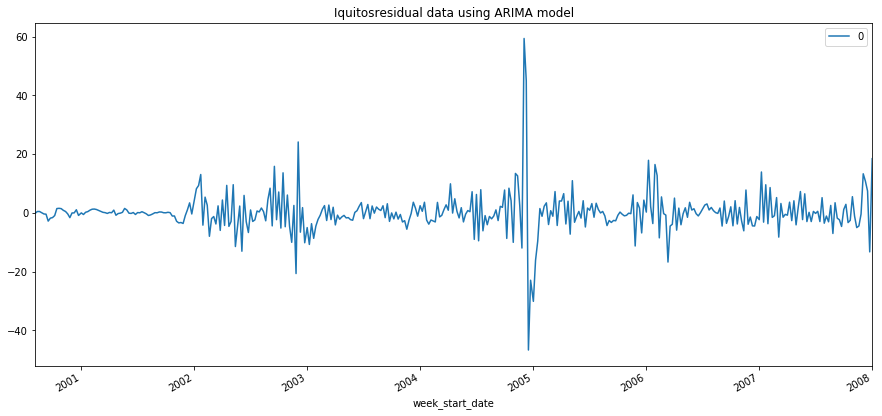

In [353]:
timeSeriesARIMA( 'Iquitos', X_iq_train, Y_iq_train, X_iq_test, Y_sj_test, 3, 1, 2 )

###### Random Forest Regressor

In [279]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(criterion='mae')
param_grid = { 
        "n_estimators"      : [95,98,100,102,105,108,110],
        "max_features"      : ["sqrt"],#, "log2"],
        "min_samples_split" : [7,8,9,10,11,12,13,14,15,20],
        "bootstrap"         : [True],#, False],
        "max_depth"         : [2,3,4,5,6]#8,10, 15, 20, 25, 30, None]
        }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5, verbose=1)
grid.fit( X_sj_train, Y_sj_train)


print( grid.best_score_ )
print( grid.best_params_ )

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:  3.1min finished


0.019553685495899722
{'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 102}


In [280]:
Y_sj_pred = grid.predict(X_sj_test).astype(int)
print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_pred, Y_sj_test))

pred_train_sj = grid.predict(X_sj_train).astype(int)
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, Y_sj_train))

San Juan Test  MAE error : 14.355371900826446
San Juan Train MAE error : 9.644628099173554


In [ ]:
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# Perform K-Fold CV
   scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

In [281]:
estimator = RandomForestRegressor(criterion='mae')
param_grid = { 
        "n_estimators"      : [10,11,12,13,14,15,16,17,18,19,20],#, 40,50,55, 60,70],#80,90,100,110,150],
        "max_features"      : ["sqrt"],#, "log2"],
        "min_samples_split" : [26,27,28,29, 30,31,32,33,34,35,36,37,38,39,40,50],#6,7,8,9,10,11,13,15
        "bootstrap"         : [True],#, False],
        "max_depth"         : [1,2,3,4,5,6,7,8]#,10, 15, 20, 25, 30, None]
        }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5, verbose=1)
grid.fit( X_iq_train, Y_iq_train)

print( grid.best_score_ )
print( grid.best_params_ )

Fitting 5 folds for each of 1408 candidates, totalling 7040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 3750 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4450 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5350 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 6450 tasks      | elapsed:  2.2min


-0.3207651002942264
{'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 36, 'n_estimators': 12}


[Parallel(n_jobs=-1)]: Done 7040 out of 7040 | elapsed:  2.5min finished


In [283]:
Y_iq_pred = grid.predict(X_iq_test).astype(int)
print ("Iquitos Test   MAE error :", mean_absolute_error(Y_iq_pred, Y_iq_test))

pred_train_iq = grid.predict(X_iq_train).astype(int)
print ("Iquitos Train  MAE error :", mean_absolute_error(pred_train_iq, Y_iq_train))

Iquitos Test   MAE error : 7.775193798449612
Iquitos Train  MAE error : 4.648578811369509


In [284]:
pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "Total Test  MAE : ", mean_absolute_error( y_test, pred ))

pred = list(pred_train_sj)  + list(pred_train_iq)
y_test = list( Y_sj_train ) + list ( Y_iq_train )
print( "Total Train MAE : ", mean_absolute_error( y_test, pred ))

Total Test  MAE :  10.96
Total Train MAE :  7.066666666666666


###### Random Forest results
- Total Test  MAE :  10.96
- Total Train MAE :  7.066666666666666
- San Juan Test  MAE error : 14.355371900826446
- San Juan Train MAE error : 9.644628099173554
- Iquitos Test   MAE error : 7.775193798449612
- Iquitos Train  MAE error : 4.648578811369509

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.6s
-0.3271822669851492
{'bootstrap': True, 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 30, 'n_estimators': 15}
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   22.4s finished

Fitting 5 folds for each of 1408 candidates, totalling 7040 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 659 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 1659 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 3059 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 4859 tasks      | elapsed:  1.6min
-0.335818517291856
{'bootstrap': True, 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 38, 'n_estimators': 19}

###### XGBoost regressor

In [387]:
import xgboost as xgb
X = pd.DataFrame( dengue_train_sj_after_1998 )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_sj_after_1998.total_cases
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1 )
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,  max_depth = 5, alpha = 1, n_estimators = 100)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=1)
print(cv_results.shape[0])
xg_reg.fit(X_train,y_train, eval_metric='rmse')

Y_sj_pred = xg_reg.predict(X_test)
print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_pred, y_test))

pred_train_sj = xg_reg.predict(X_train)
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, y_train))

[20:34:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:34:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:34:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
50
[20:34:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
San Juan Test  MAE error : 10.517089833897993
San Juan Train MAE error : 0.8241571312765116


###### 

In [428]:
dengue_train_sj_after_1998.shape

(484, 85)

In [456]:

X = pd.DataFrame( dengue_train_sj )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_sj.total_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1 )
#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4],#,0.6,0.8],
    'gamma':[0],#[0,0.01]0.03,0.1,0.3,1],
    'min_child_weight':[10],#[12,11,10,9,8][15,20,10],[1.5,6,10],
    'learning_rate':[0.01],#[0.06,0.01,0.05,0.07,0.09,0.1,0.5,0.1,0.5,0.07],
    'max_depth':[6],#[4,6,7,5]
    'n_estimators':[100],#[500,1000,1500,2390,2400,2370,2420][160,170,180,190,200,210,220][110,130,200,250,150],[10,20,40,50,70,100,150],
    'reg_alpha':[0.01],#[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5],#[1e-5, 1e-2, 0.45],
    'subsample':[0.95]#,0.9,0.7]  #[0.6,0.95
}
                   
xgb_model = xgb.XGBRegressor(learning_rate =0.06, n_estimators=2400, max_depth=5,
     min_child_weight=10, gamma=0, subsample=0.95, colsample_bytree=0.35, nthread=6,
                             reg_alpha = 0.01,  reg_lambda=1e-5, seed=1)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=-1,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X,y, eval_metric='rmse')
#print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)
#best params
#{'colsample_bytree': 0.4, 'gamma': 0, 'learning_rate': 0.06, 'max_depth': 4, 'min_child_weight': 10, 'n_estimators': 2400, 'reg_alpha': 0.01, 'reg_lambda': 1e-05, 'subsample': 0.95}
#
best params
{'colsample_bytree': 0.4, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 10, 'n_estimators': 100, 'reg_alpha': 0.01, 'reg_lambda': 1e-05, 'subsample': 0.95}
best score
-2772.090974305669
#xgb_model.fit(X_train,y_train)
#Y_sj_pred = gsearch1.predict(X_test)
#print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_pred, y_test))
#
#pred_train_sj = xgb_model.predict(X_train)
#print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, y_train))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:    6.4s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:    7.2s remaining:    2.3s


[11:10:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
best params
{'colsample_bytree': 0.4, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 10, 'n_estimators': 100, 'reg_alpha': 0.01, 'reg_lambda': 1e-05, 'subsample': 0.95}
best score
-2772.090974305669


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.1s finished


In [391]:
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

best params
{'colsample_bytree': 0.4, 'gamma': 0, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 150, 'reg_alpha': 0.01, 'reg_lambda': 1e-05, 'subsample': 0.95}
best score
-221.30574016335223


In [505]:
X = pd.DataFrame( dengue_train_iq )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_iq.total_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1 )
#for tuning parameters
#parameters_for_testing = {
#    'colsample_bytree':[0.7],#[0.8,0.9,0.7,0.4,0.6]
#    'gamma':[1],#[2,0.1,3,2,2.5,4,5][0.9,2,10,1][0,0.03,0.1,0.3,1],
#    'min_child_weight':[40],#,38,50,100,28,30,3515,11,[9,20,10][1.5,6,10],
#    'learning_rate':[0.1],#[,0.2,0.075,0.06,0.07,0.1,0.50.075,0.06,0.07][0.1,0.5,0.07]
#    'max_depth':[8],#[,9,10,7,6,53,5,6],
#    'n_estimators':[18],#[15,19,18,17,20,25,3010,20,40,50,60][50,70,100,150]
#    'reg_alpha':[1e-5], #[1e-5, 1e-4][1e-5, 1e-2,  0.75]
#    'reg_lambda':[  0.75], #[1e-5, 1e-4][1e-5, 1e-2, 0.45]
#    'subsample':[0.5]#[0.35,0.5,0.6]1,0.9,0.95][0.6,0.95]  
#}
                   
#xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=1)
#Iquitos Test  MAE error : 4.778052127869555
#Iquitos Train MAE error : 0.0003158694243862339
xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=15, max_depth=8,
     min_child_weight=2, gamma=0, subsample=0.7, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=1,
                             reg_alpha=1e-4,reg_lambda=0.75 )
xgb_model.fit(X_train,y_train)
Y_iq_pred = xgb_model.predict(X_test)
print ("Iquitos Test  MAE error :", mean_absolute_error(Y_iq_pred, y_test))
pred_train_iq = xgb_model.predict(X_train)
print ("Iquitos Train MAE error :", mean_absolute_error(pred_train_iq, y_train))

#gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=-1,iid=False, verbose=10,scoring='neg_mean_squared_error')
#gsearch1.fit(X,y)#, eval_metric='rmse')
#print (gsearch1.grid_scores_)
#print('best params')
#print (gsearch1.best_params_)
#print('best score')
#print (gsearch1.best_score_)
##best params
#{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.07, 'max_depth': 6, 'min_child_weight': 10, 'n_estimators': 50, 'reg_alpha': 1e-05, 'reg_lambda': 1e-05, 'subsample': 0.95}
#best score
#-102.10292852776344
#best params
#{'colsample_bytree': 0.8, 'gamma': 2, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 20, 'reg_alpha': 0.0001, 'reg_lambda': 0.0001, 'subsample': 0.95}
#best score
#-94.93186022931268
#{'colsample_bytree': 0.8, 'gamma': 2, 'learning_rate': 0.07, 'max_depth': 8, 'min_child_weight': 10, 'n_estimators': 15, 'reg_alpha': 0.0001, 'reg_lambda': 0.0001, 'subsample': 0.95}
#best score
# best for after 1998
#-94.59288930473797
#{'colsample_bytree': 0.8, 'gamma': 2, 'learning_rate': 0.07, 'max_depth': 8, 'min_child_weight': 10, 'n_estimators': 16, 'reg_alpha': 0.0001, 'reg_lambda': 0.0001, 'subsample': 0.95}
#best score
#-94.21553662483738

# with full data
#best params
#{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 20, 'n_estimators': 16, 'reg_alpha': 1e-05, 'reg_lambda': 0.75, 'subsample': 0.95}
#best score
#-111.63345081606504
#best params
#{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 25, 'n_estimators': 17, 'reg_alpha': 1e-05, 'reg_lambda': 0.75, 'subsample': 0.6}
#best score
#-111.52404625221861
#best params
#{'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 30, 'n_estimators': 17, 'reg_alpha': 1e-05, 'reg_lambda': 0.75, 'subsample': 0.5}
#best score
#-108.07072066535359
#{'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 40, 'n_estimators': 18, 'reg_alpha': 1e-05, 'reg_lambda': 0.75, 'subsample': 0.5}
#best score
#-107.3994204951601
#{'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 40, 'n_estimators': 18, 'reg_alpha': 1e-05, 'reg_lambda': 0.75, 'subsample': 0.5}
#best score
#-107.3994204951601

[11:38:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Iquitos Test  MAE error : 4.5029019311416985
Iquitos Train MAE error : 2.7404500774326865


###### Ensemble
Ensemble is to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses.

In [ ]:
from sklearn.ensemble import VotingRegressor


Referrences
1. https://machinelearningmastery.com/time-series-data-stationary-python/
2. https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
3. https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
4. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
https://www.datacamp.com/community/tutorials/xgboost-in-python
https://scikit-learn.org/stable/modules/ensemble.html
http://www.flutterbys.com.au/stats/tut/tut10.6a.html